In [35]:
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
sorts = [
    "selection",
    "bubble",
    "bubble-iverson-1",
    "bubble-iverson-2",
    "insertion",
    "bin-insertion",
    "counting",
    "radix",
    "merge",
    "quick",
    "heap",
    "shell-ciura",
    "shell"
]

arrays = [
    "small-range",
    "big-range",
    "almost-sorted",
    "reversed"
]

In [37]:
data = pd.read_csv('../data/time-large.csv', sep=';', header=None)
data.columns = ['sort', 'array', 'size', 'time']

In [38]:
def print_sort(data, sort):
    sort_df = data[data['sort'] == sort]
    plt.figure(figsize=(20, 20))
    for array in arrays:
        df = sort_df[sort_df['array'] == array]
        plt.plot(df['size'], df['time'], label=array)
    plt.title(sort)
    plt.xlabel('Array Size')
    plt.xticks(sort_df['size'].unique())
    plt.ylabel('Time (nanoseconds)')
    plt.legend(labelcolor='black', prop={'size': 15})

In [39]:
def print_array(data, array):
    array_df = data[data['array'] == array]
    plt.figure(figsize=(20, 20))
    for sort in sorts:
        df = array_df[array_df['sort'] == sort]
        plt.plot(df['size'], df['time'], label=sort)
    plt.title(array)
    plt.xlabel('Array Size')
    plt.xticks(array_df['size'].unique())
    plt.ylabel('Time (nanoseconds)')
    plt.legend(labelcolor='black', prop={'size': 15})

# Зависимость времени выполнения от размера массива
для размера массива от 50 до 300, шаг 50

## По сортировкам


### 1. Выбором

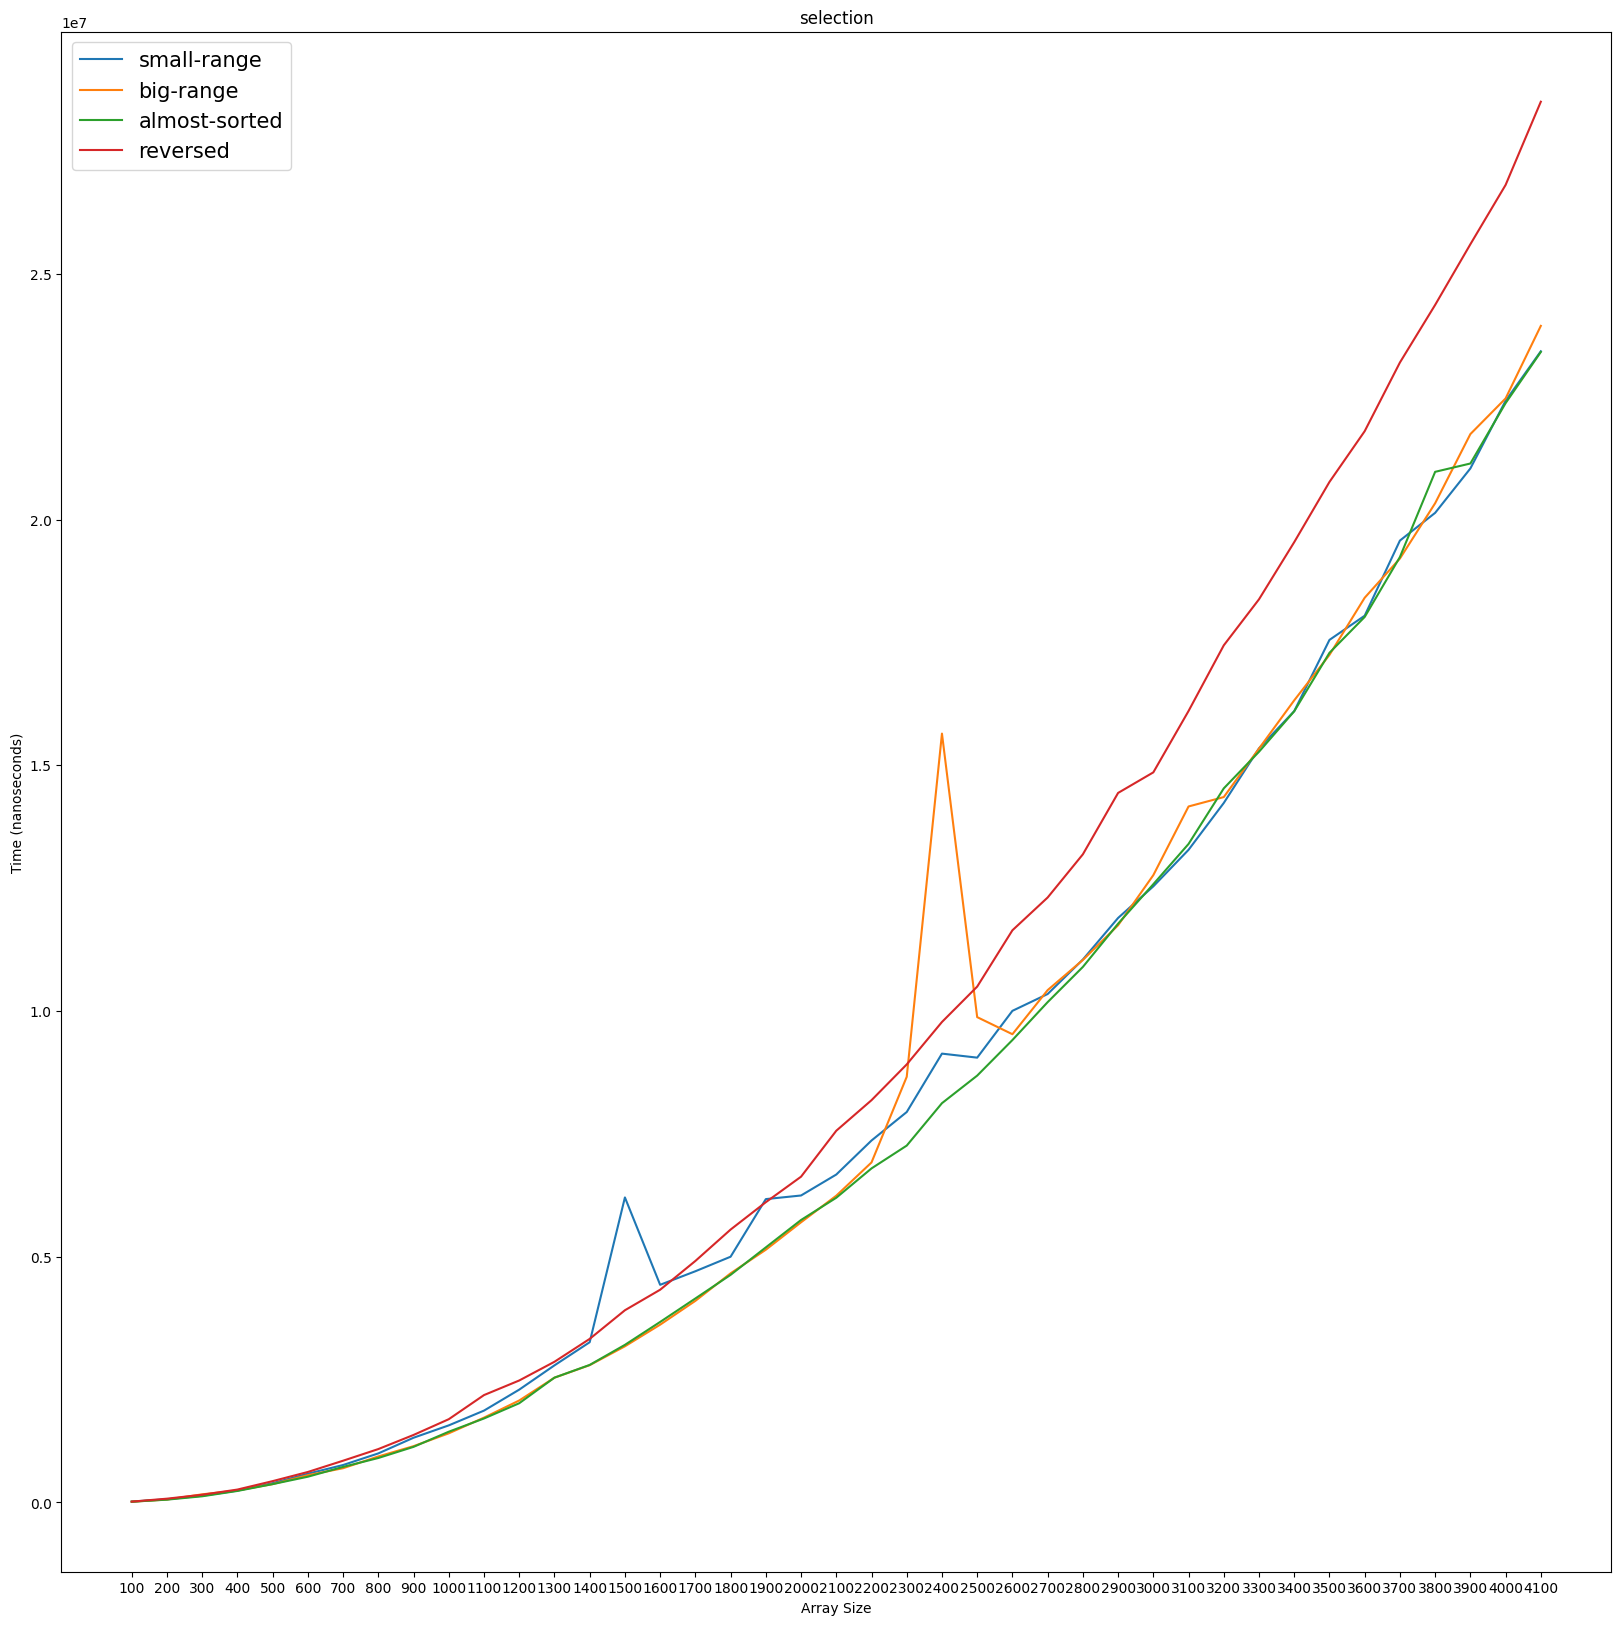

In [40]:
print_sort(data, sorts[0])

**Вывод:** сортировка для перевёрнутого массива показывает результат хуже, потому что мы каждый раз записываем новый индекс минимального элемента

### 2. Пузырьком

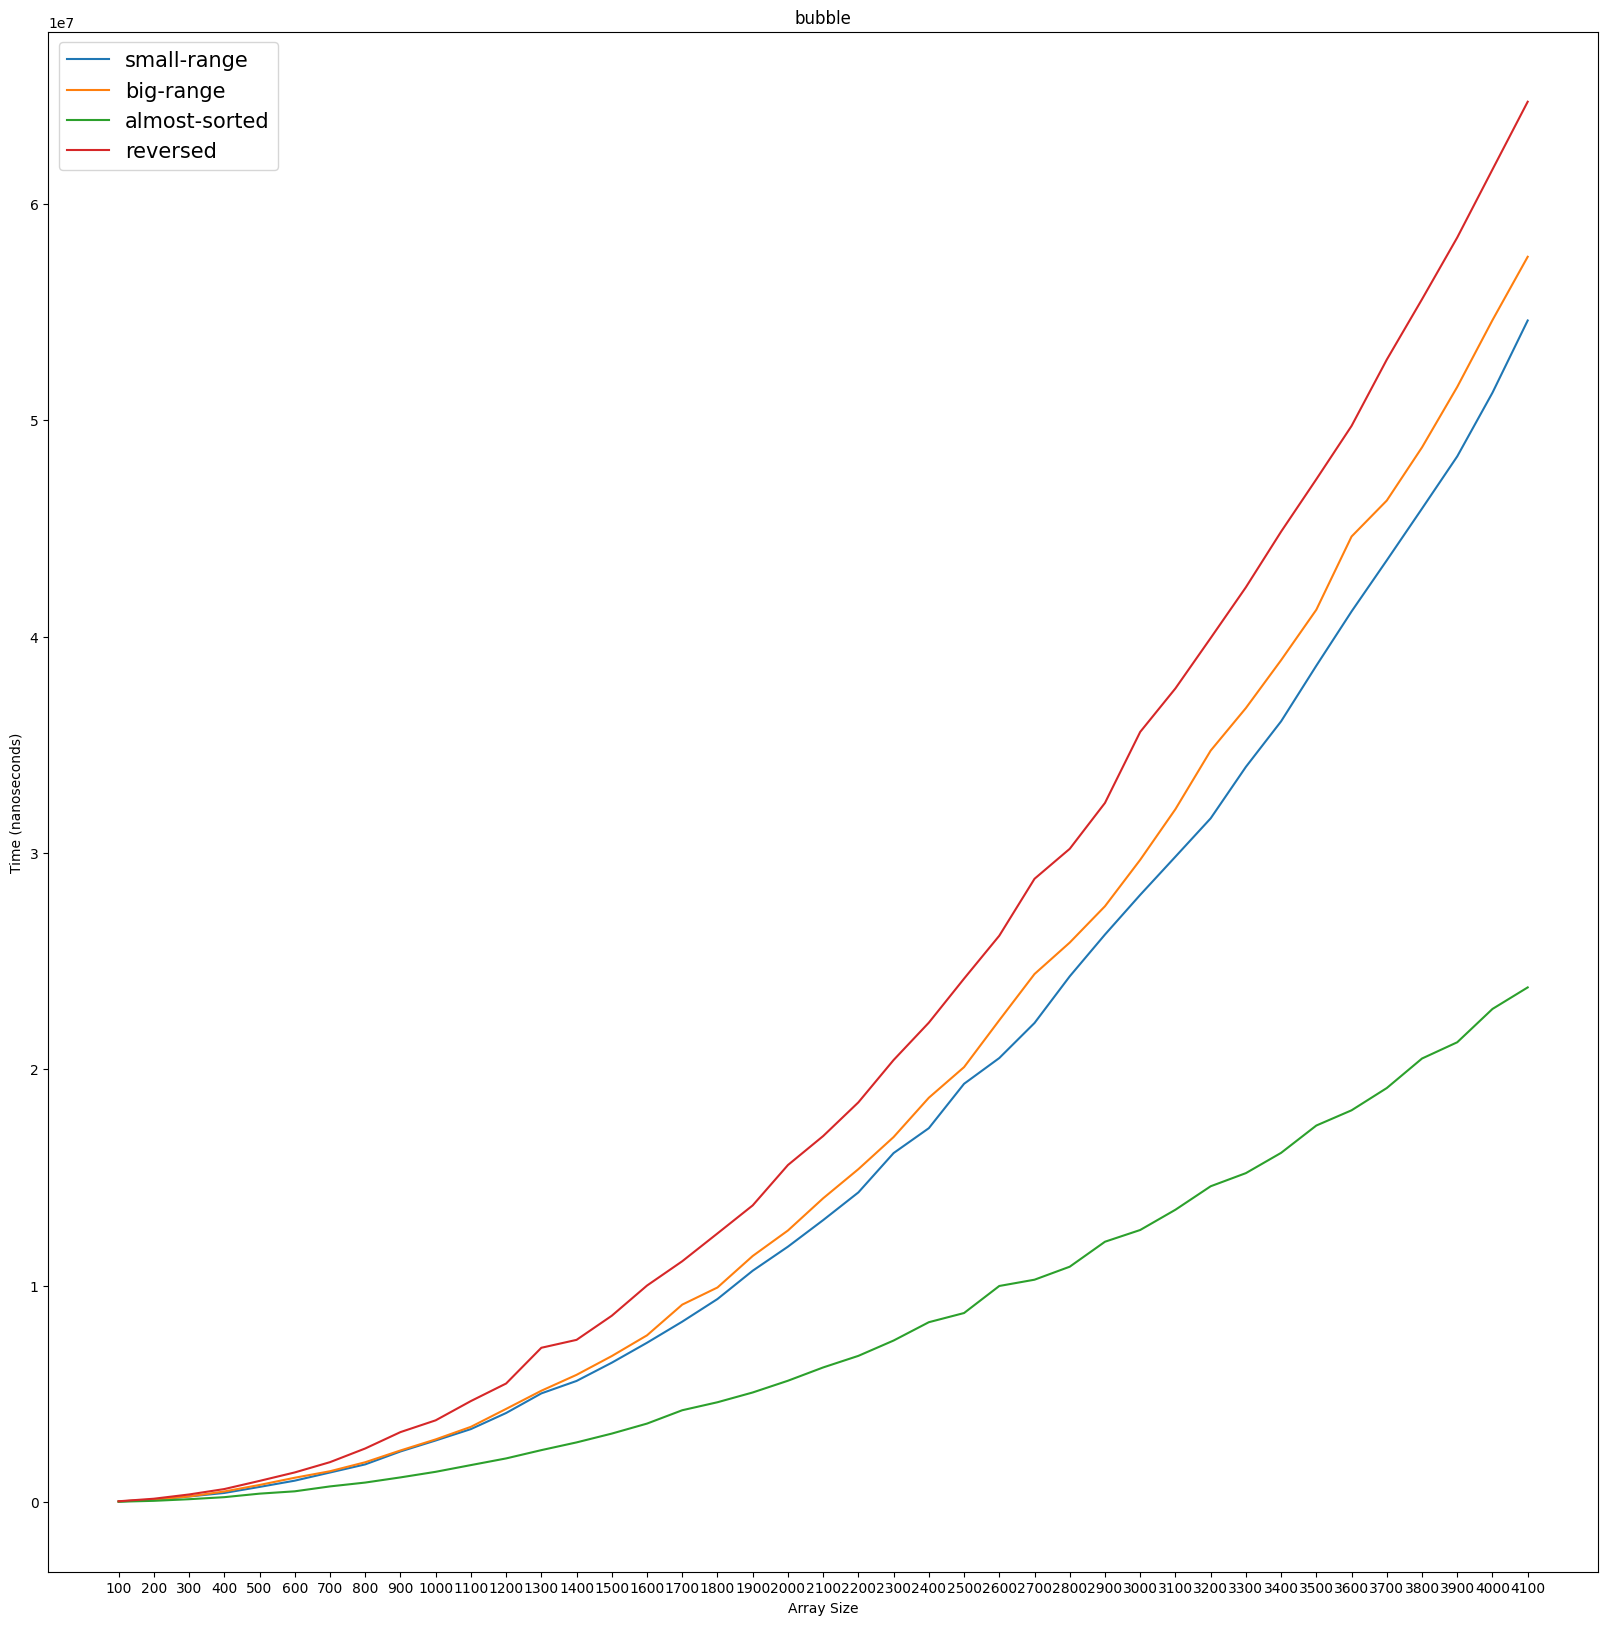

In [41]:
print_sort(data, sorts[1])

**Вывод:** аналогично выводу для небольших размеров: алгоритм чувствителен к порядку элементов (меньше инверсий в исходном массиве -- быстрее сортировка), что и показано на графике

### 3. Пузырьком с условием Айверсона 1

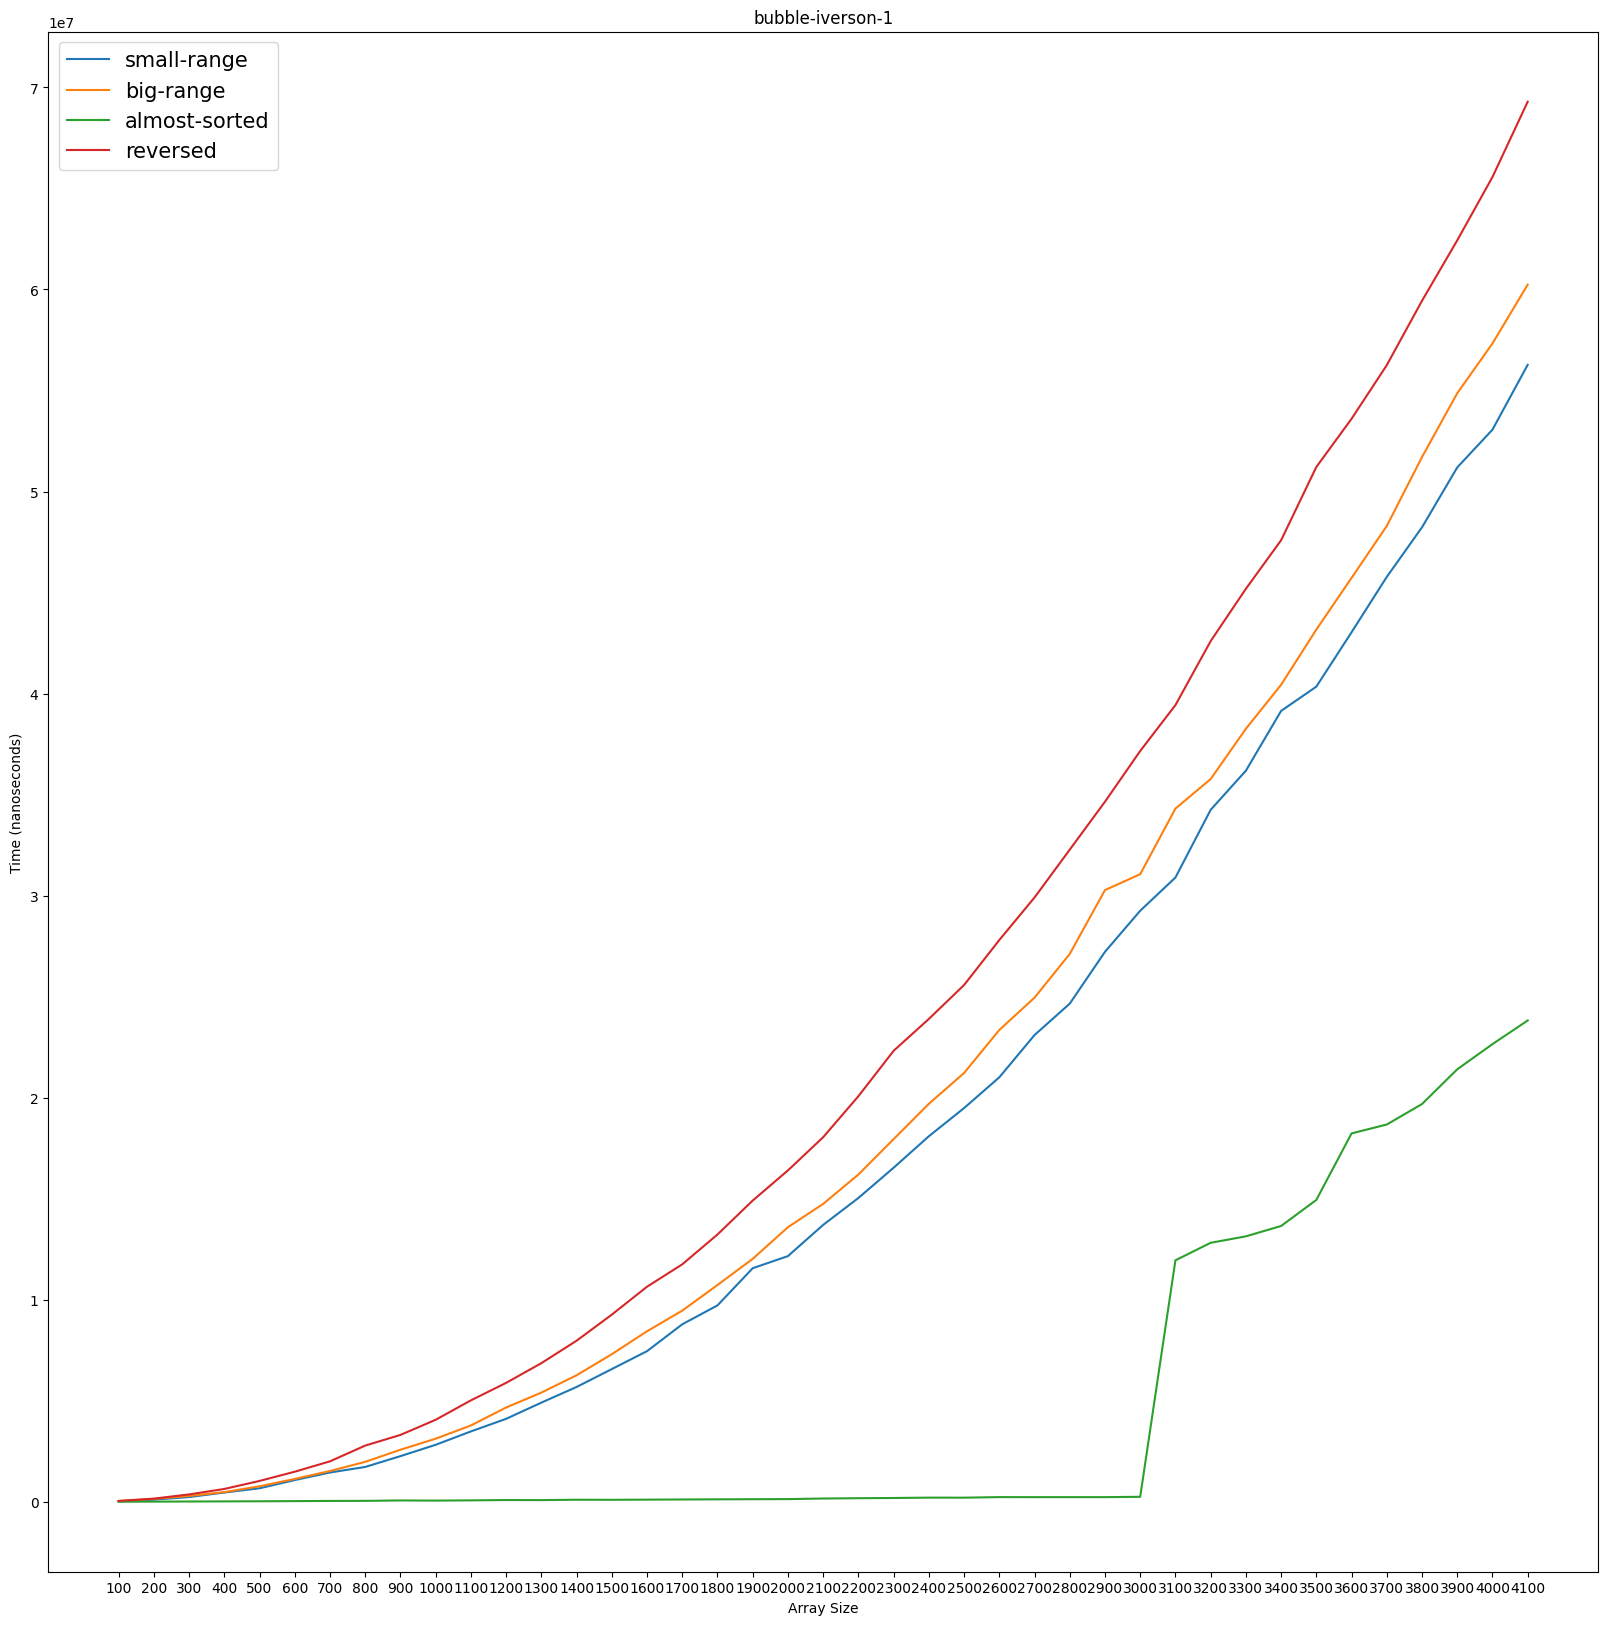

In [42]:
print_sort(data, sorts[2])

**Вывод:** опять же, флаг с условием Айверсона 1 значительно ускоряет сортировку для почти отсортированных массивов. Выброс после 3000 элементов неочевиден

### 4. Пузырьком с условием Айверсона 1 + 2

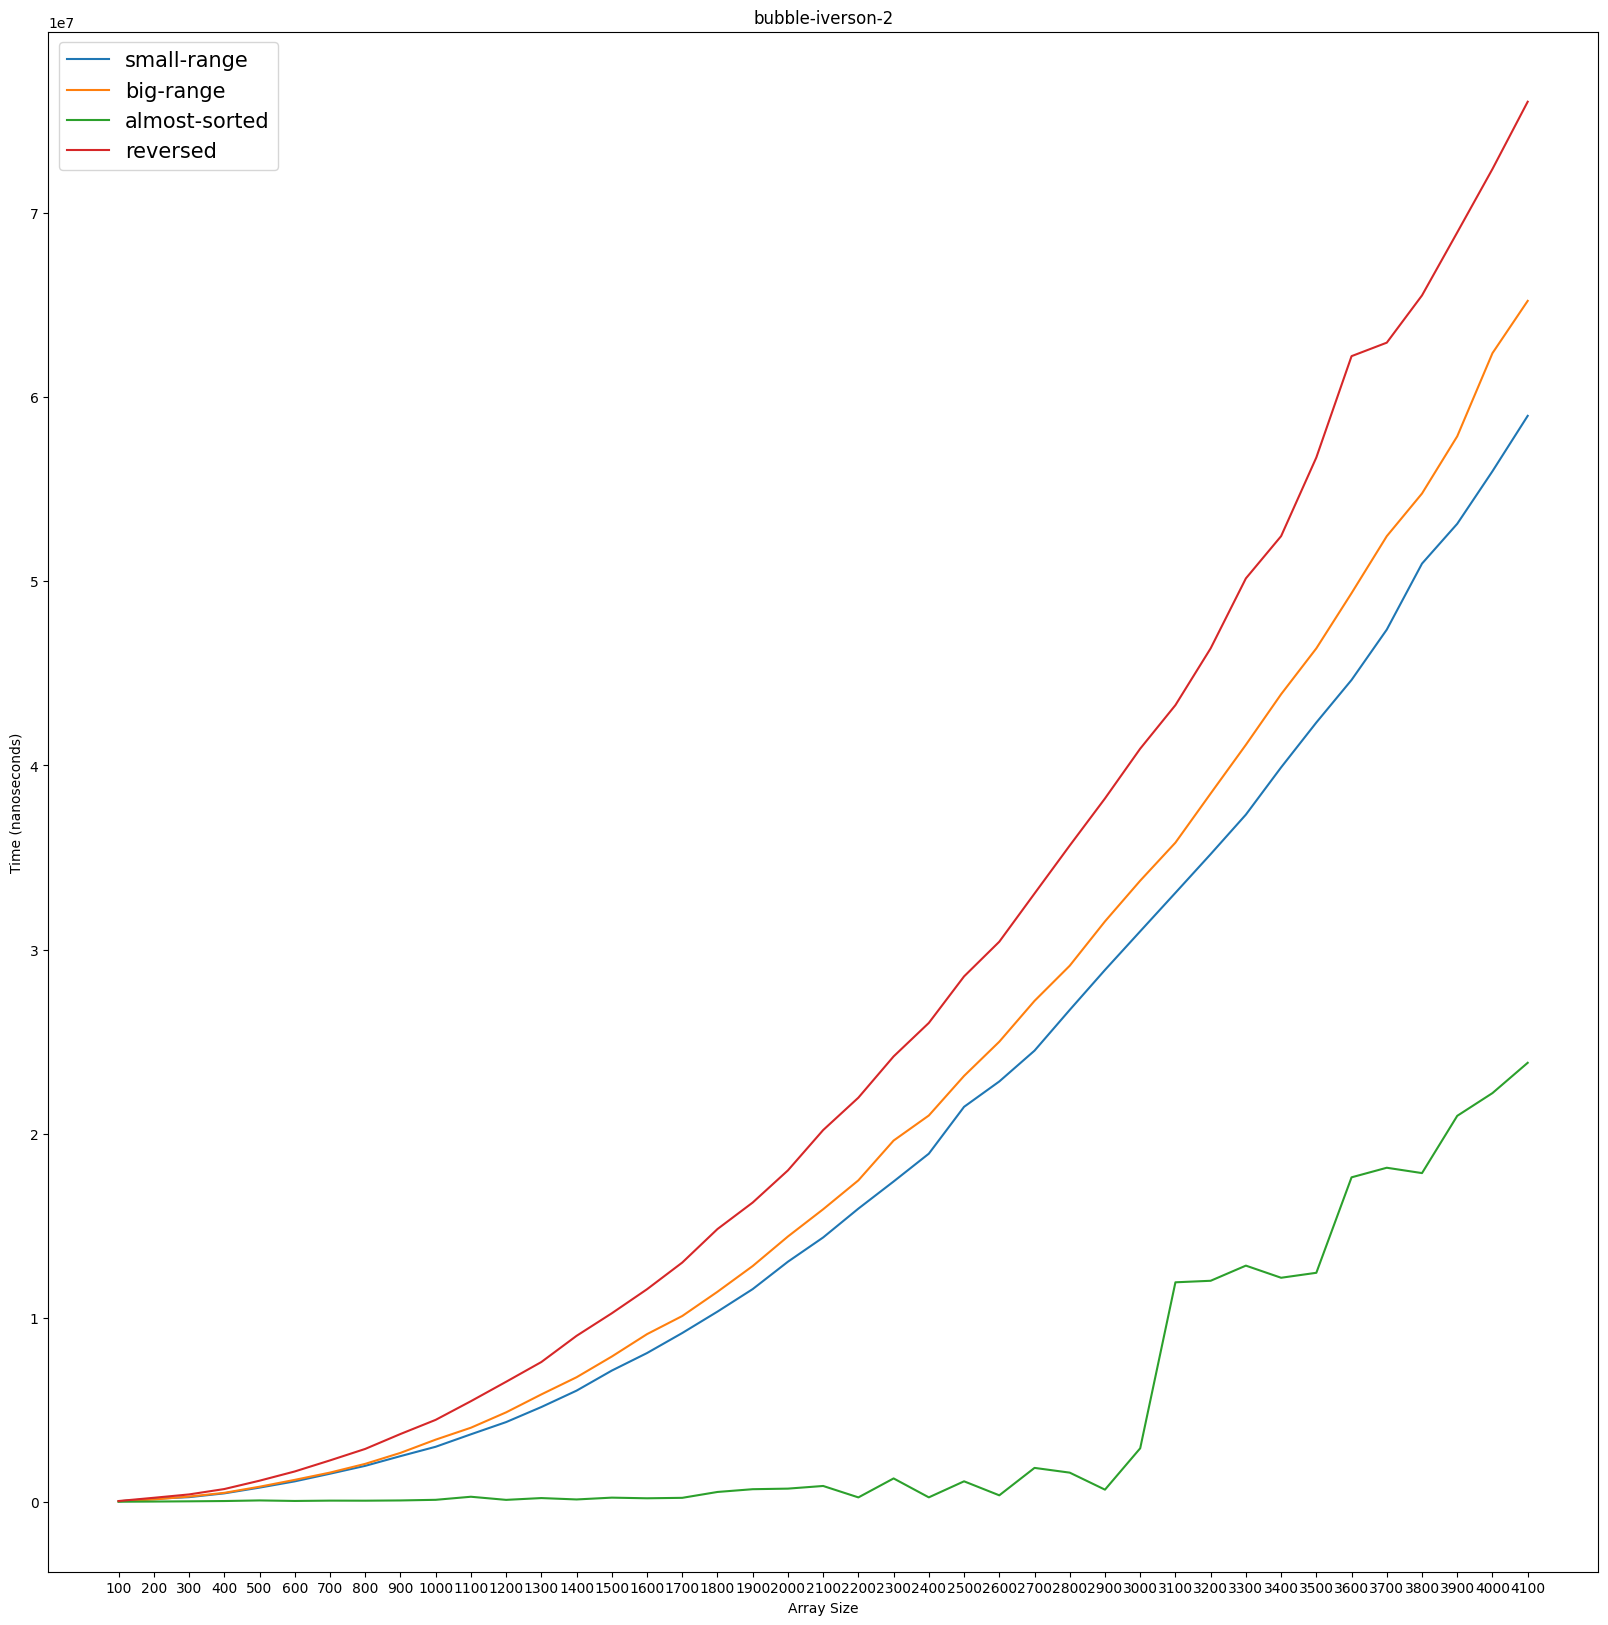

In [43]:
print_sort(data, sorts[3])

**Вывод:** Добавить снова нечего: отпизация для `almost sorted` за счёт первого условия, про выброс с 3000 не знаю(

### 5. Простыми вставками

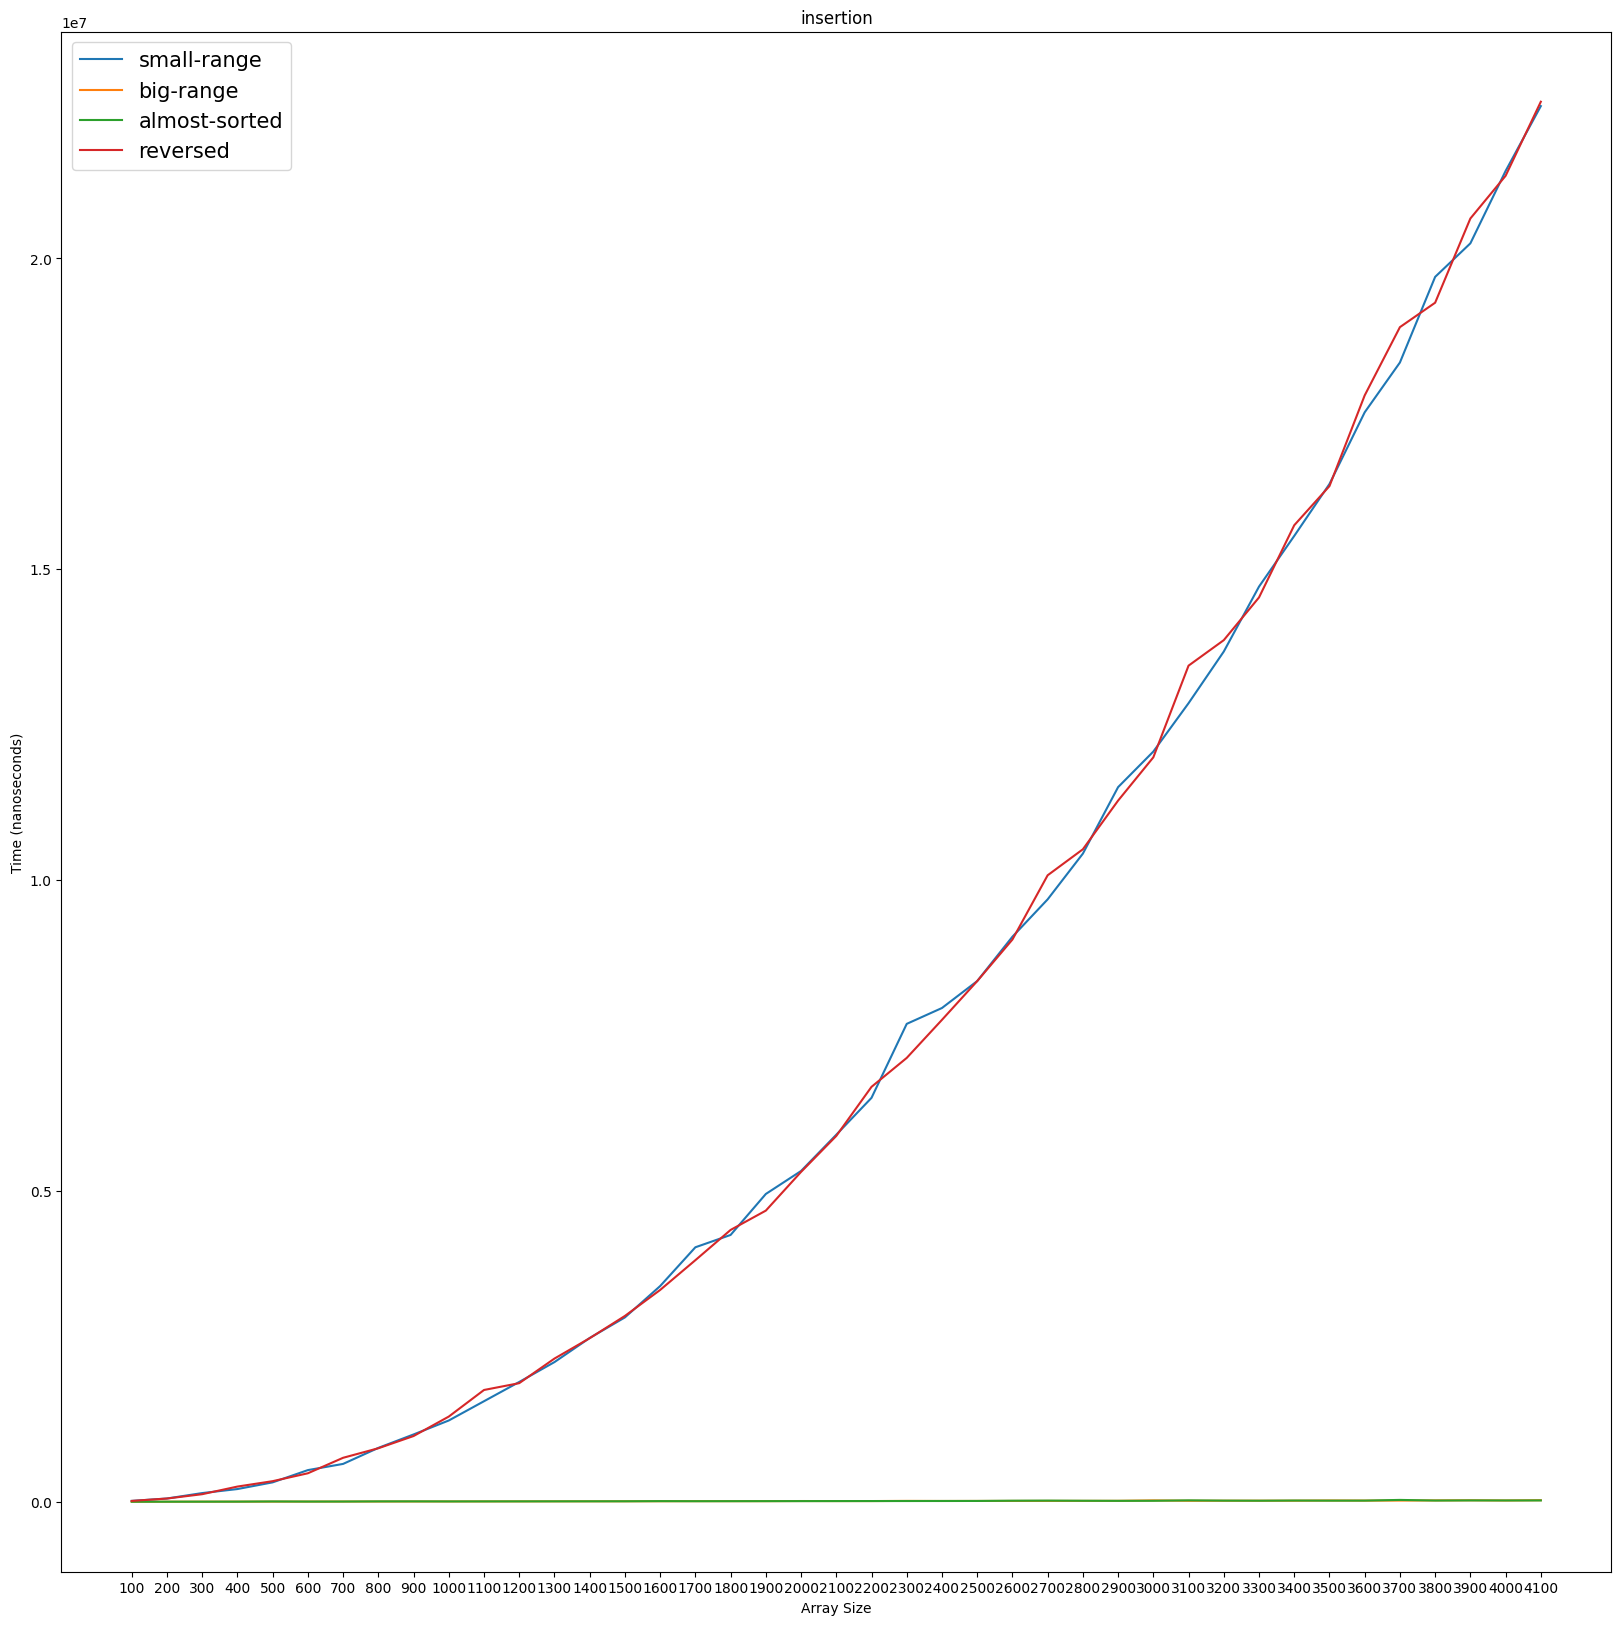

In [44]:
print_sort(data, sorts[4])

**Вывод:** для `almost sorted` ускорение объясняется небольшим количеством требуемых сдвигов. С быстрым `big range` и медленным `small range` -- неочевидно

### 6. Бинарными вставками

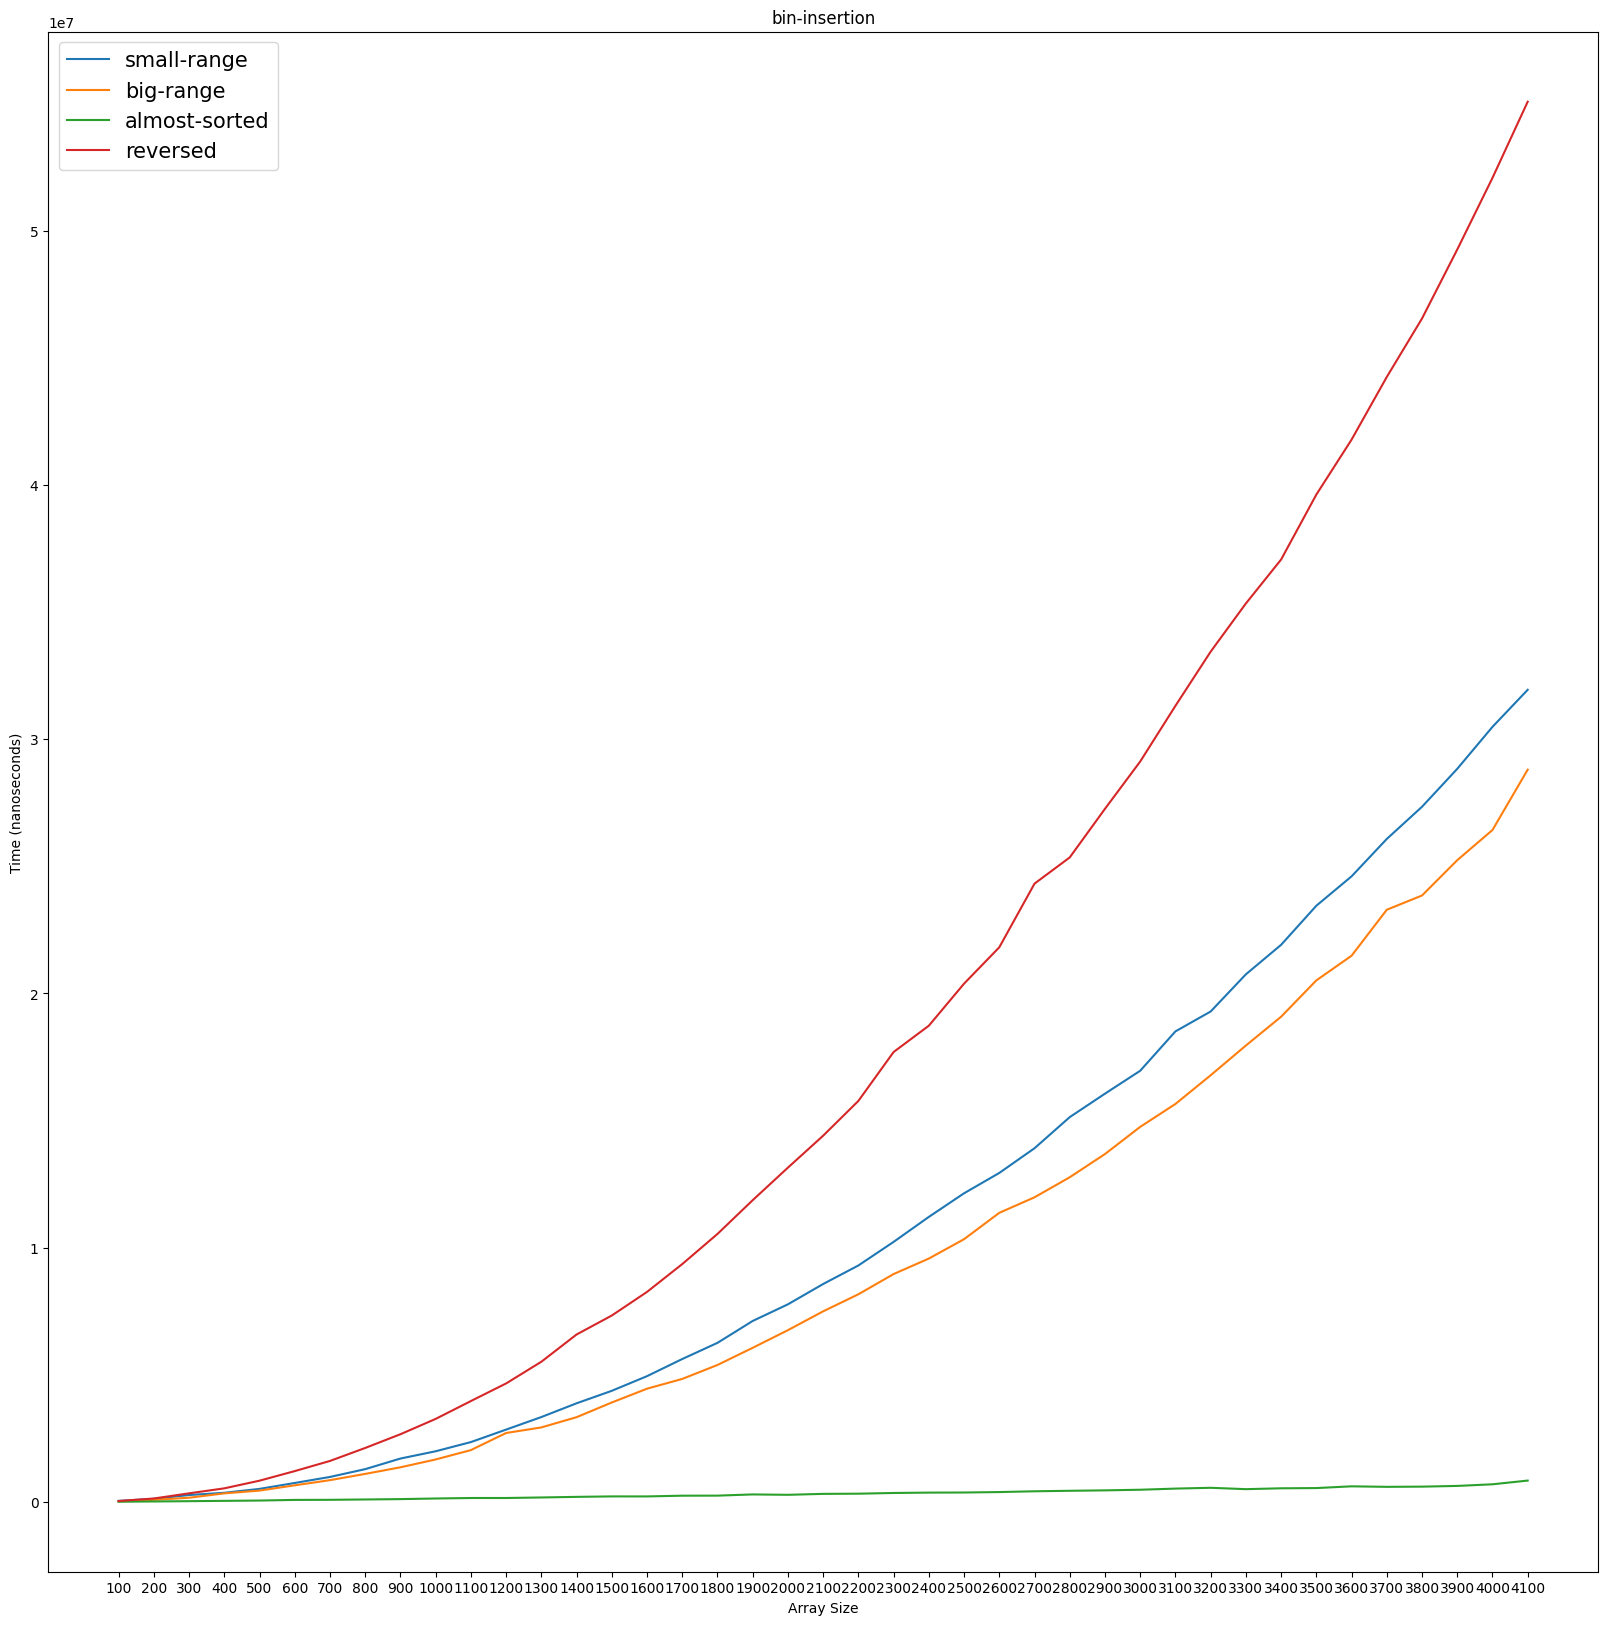

In [45]:
print_sort(data, sorts[5])

**Вывод:** Видим, что бинарный поиск места вставки сравнительно ускорил сортировку всех массивов по сравнению с `reversed` (замечу, что именно для него раньше местов вставки искалось за линию, а сейчас за логарифм от размера отсортированной части). Сам бинпоиск влияет только на асимптотику выбора места вставки

### 7. Подсчётом

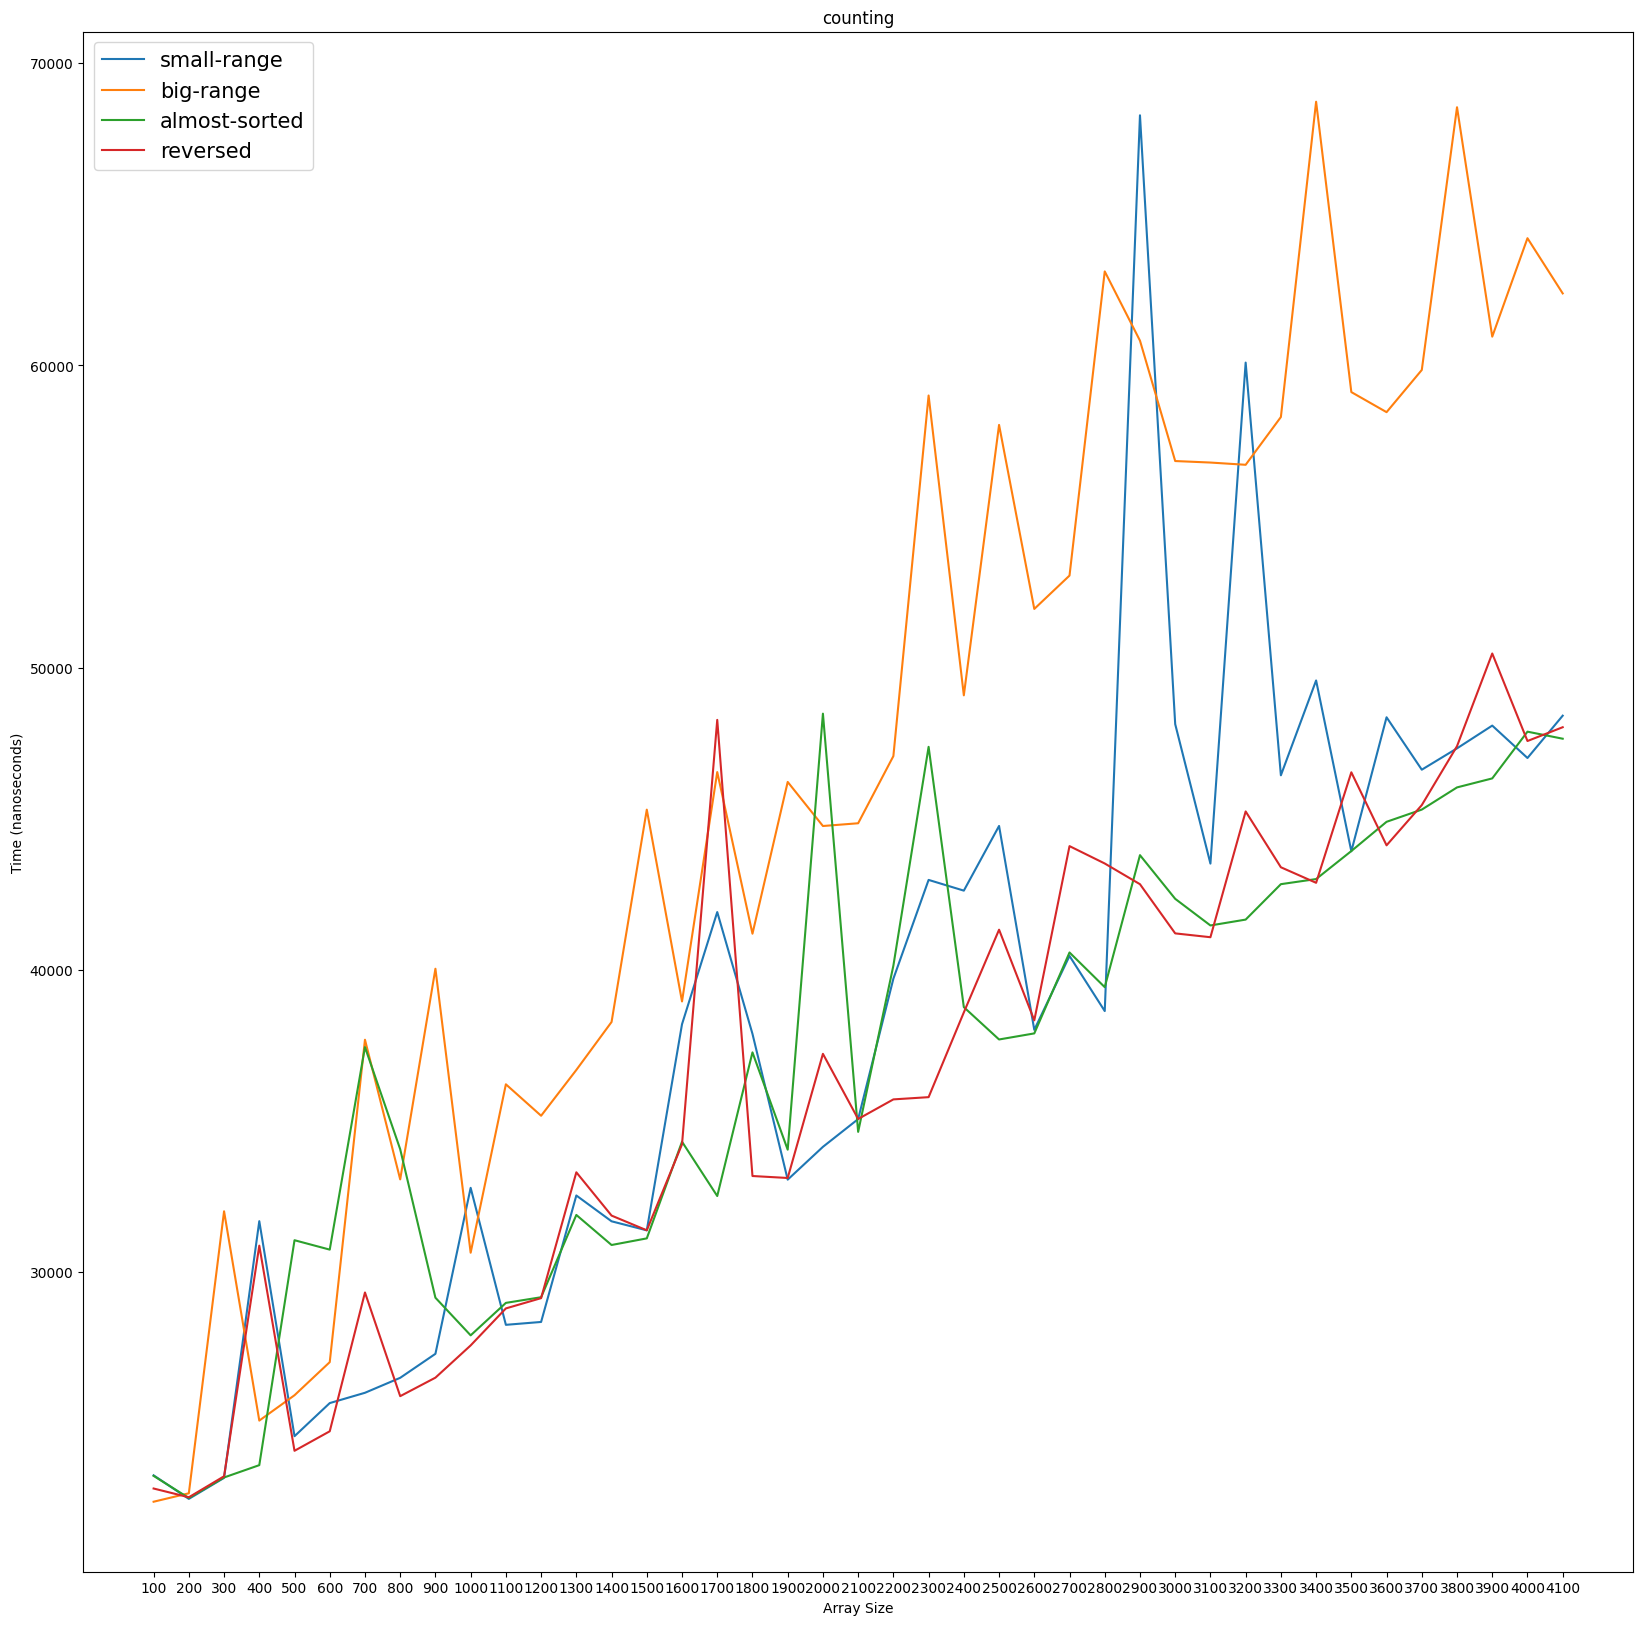

In [46]:
print_sort(data, sorts[6])

**Вывод:** графику явно плохо, но тут должна быть линия. Замедление для `big range` могу попробовать объяснить более долгими обращениями к разным частям памяти, вместо подгрузки недавних значений из более быстрого кэша

### 8. Цифровая

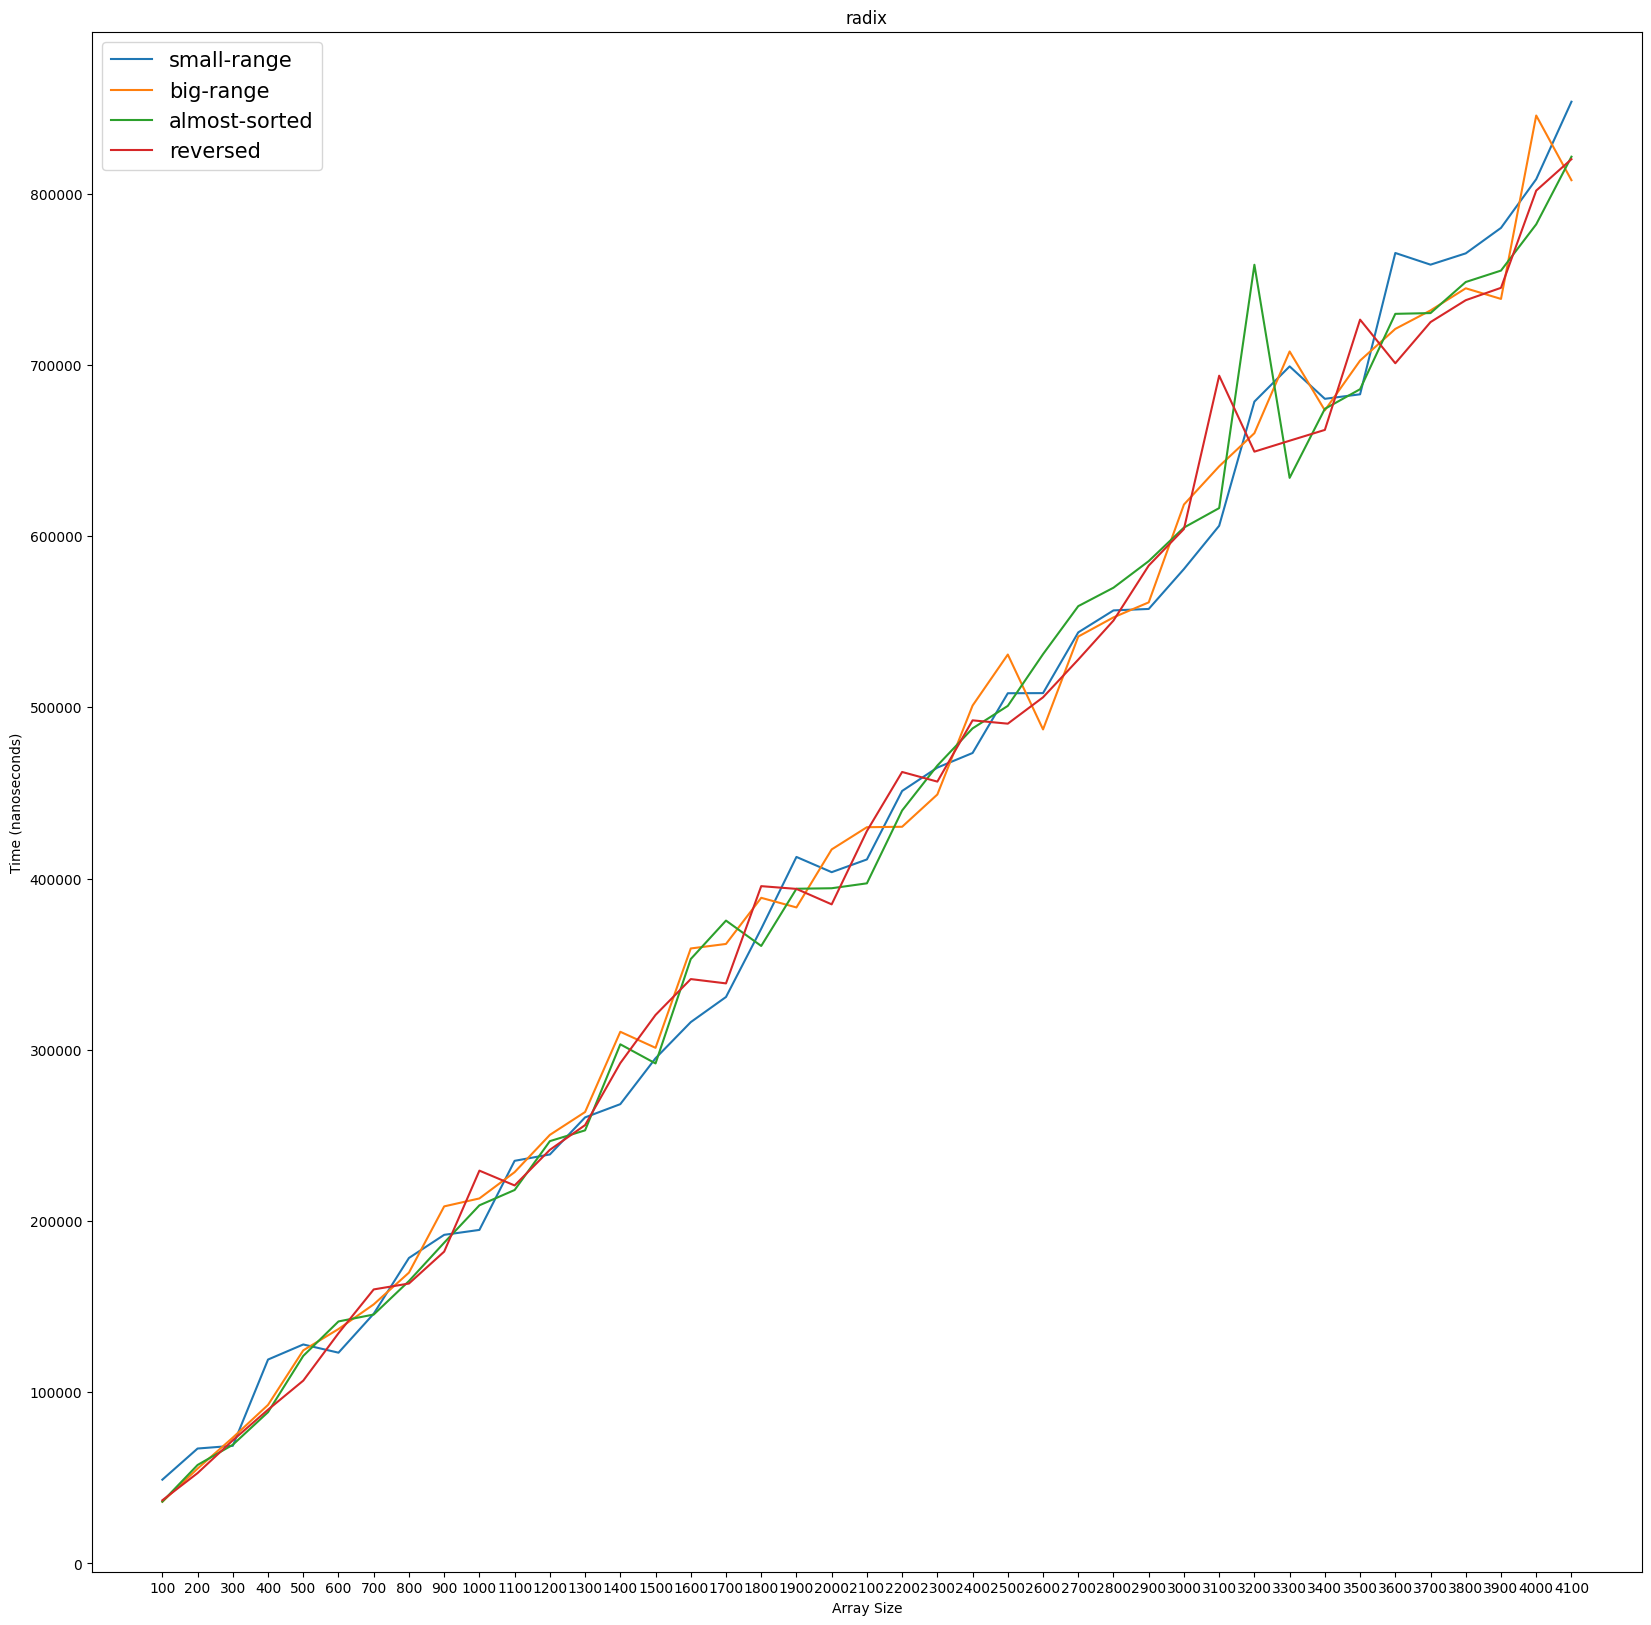

In [47]:
print_sort(data, sorts[7])

**Вывод:** для всех массивов +- одинаково, могу сослаться на алгоритм, который не чувствителен к порядку элементов

### 9. Слиянием

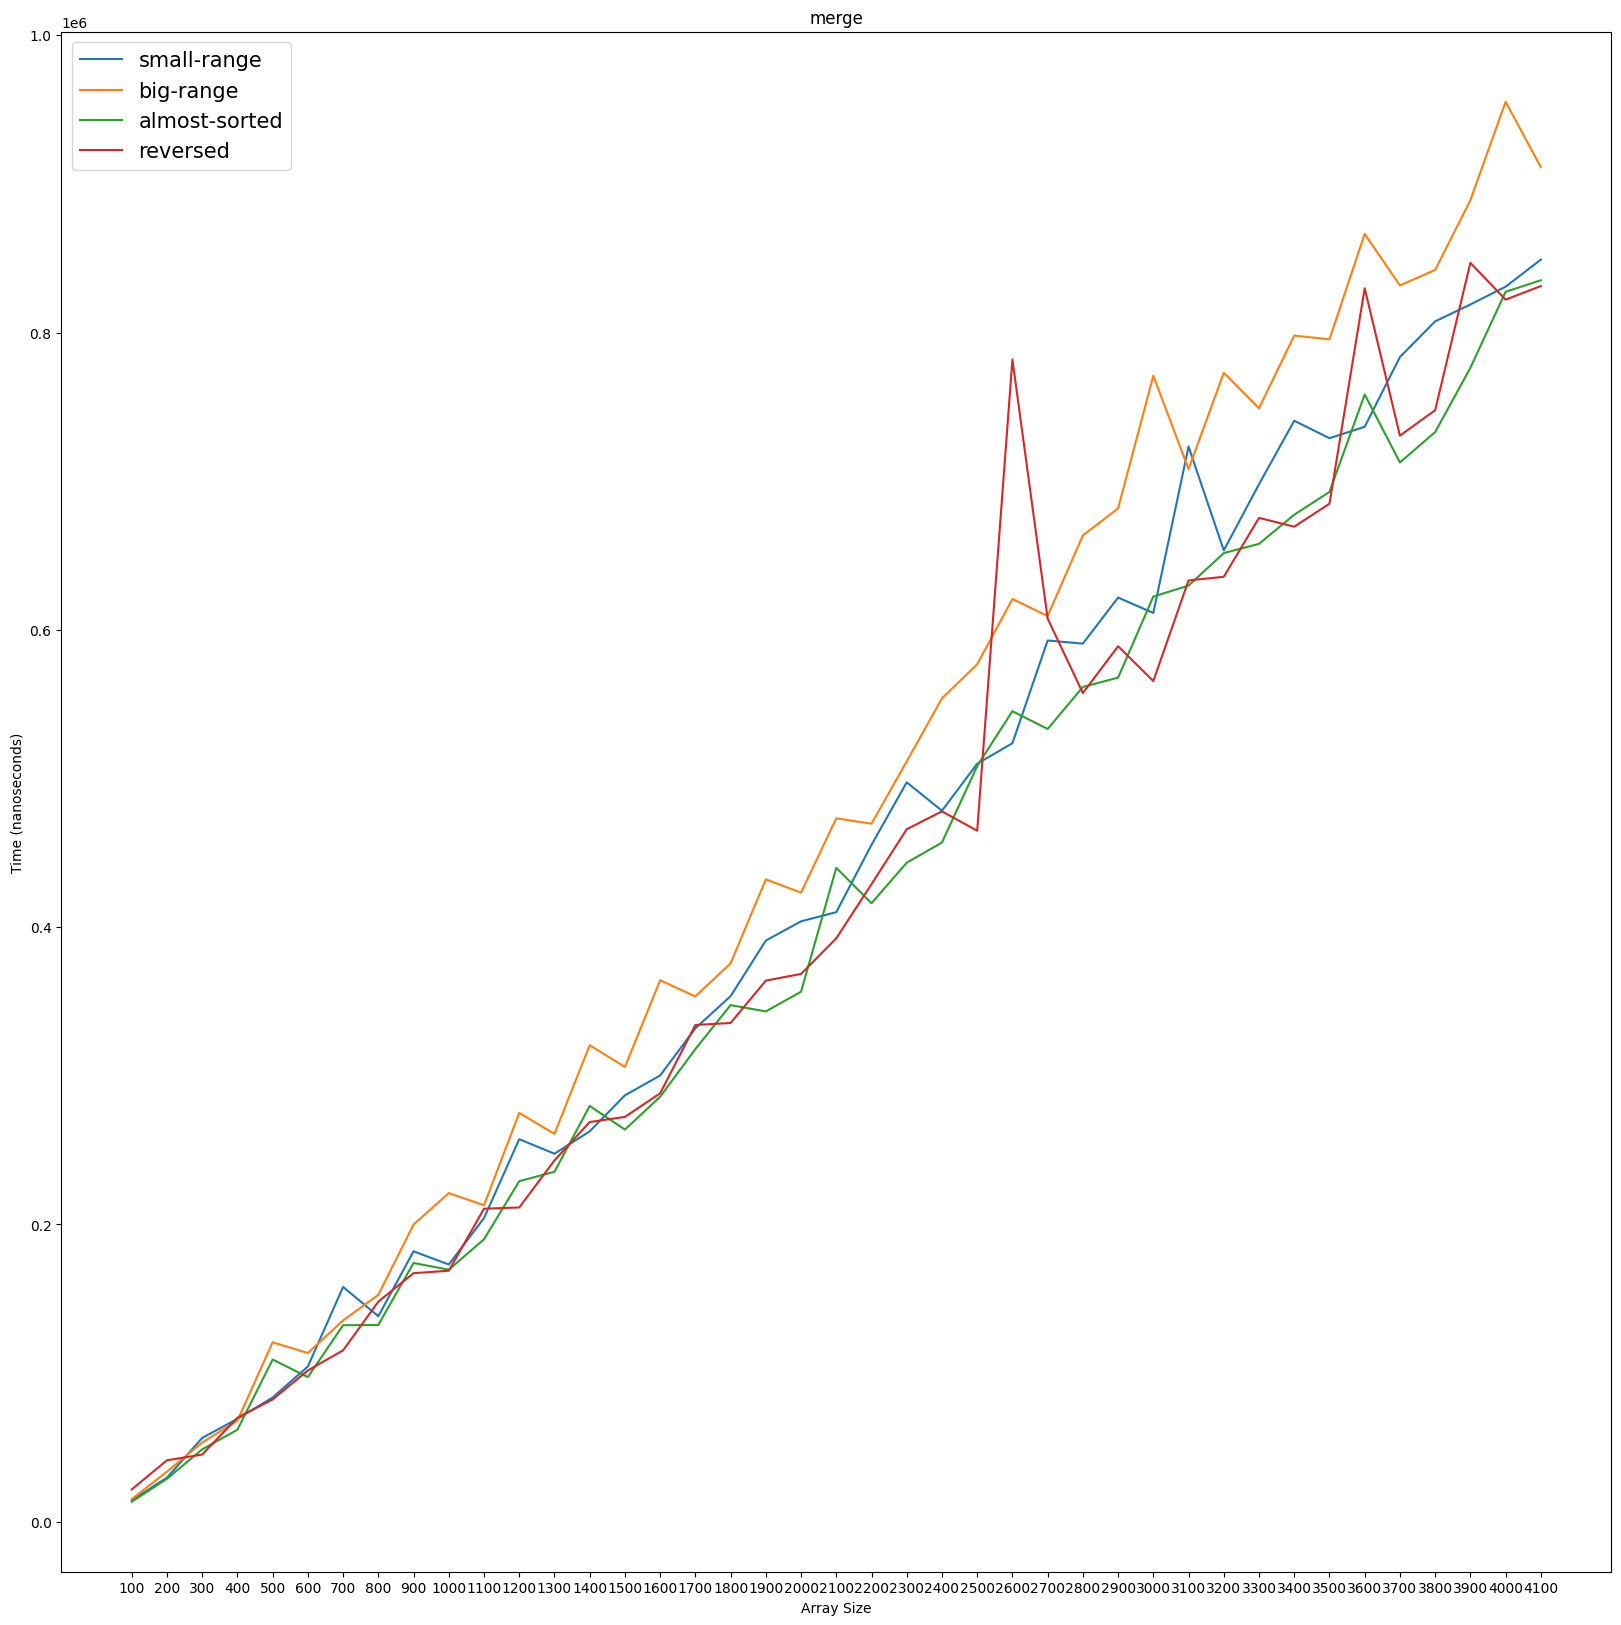

In [48]:
print_sort(data, sorts[8])

**Вывод:** сортировка нечувствительна к порядку элементов

### 10. Быстрая

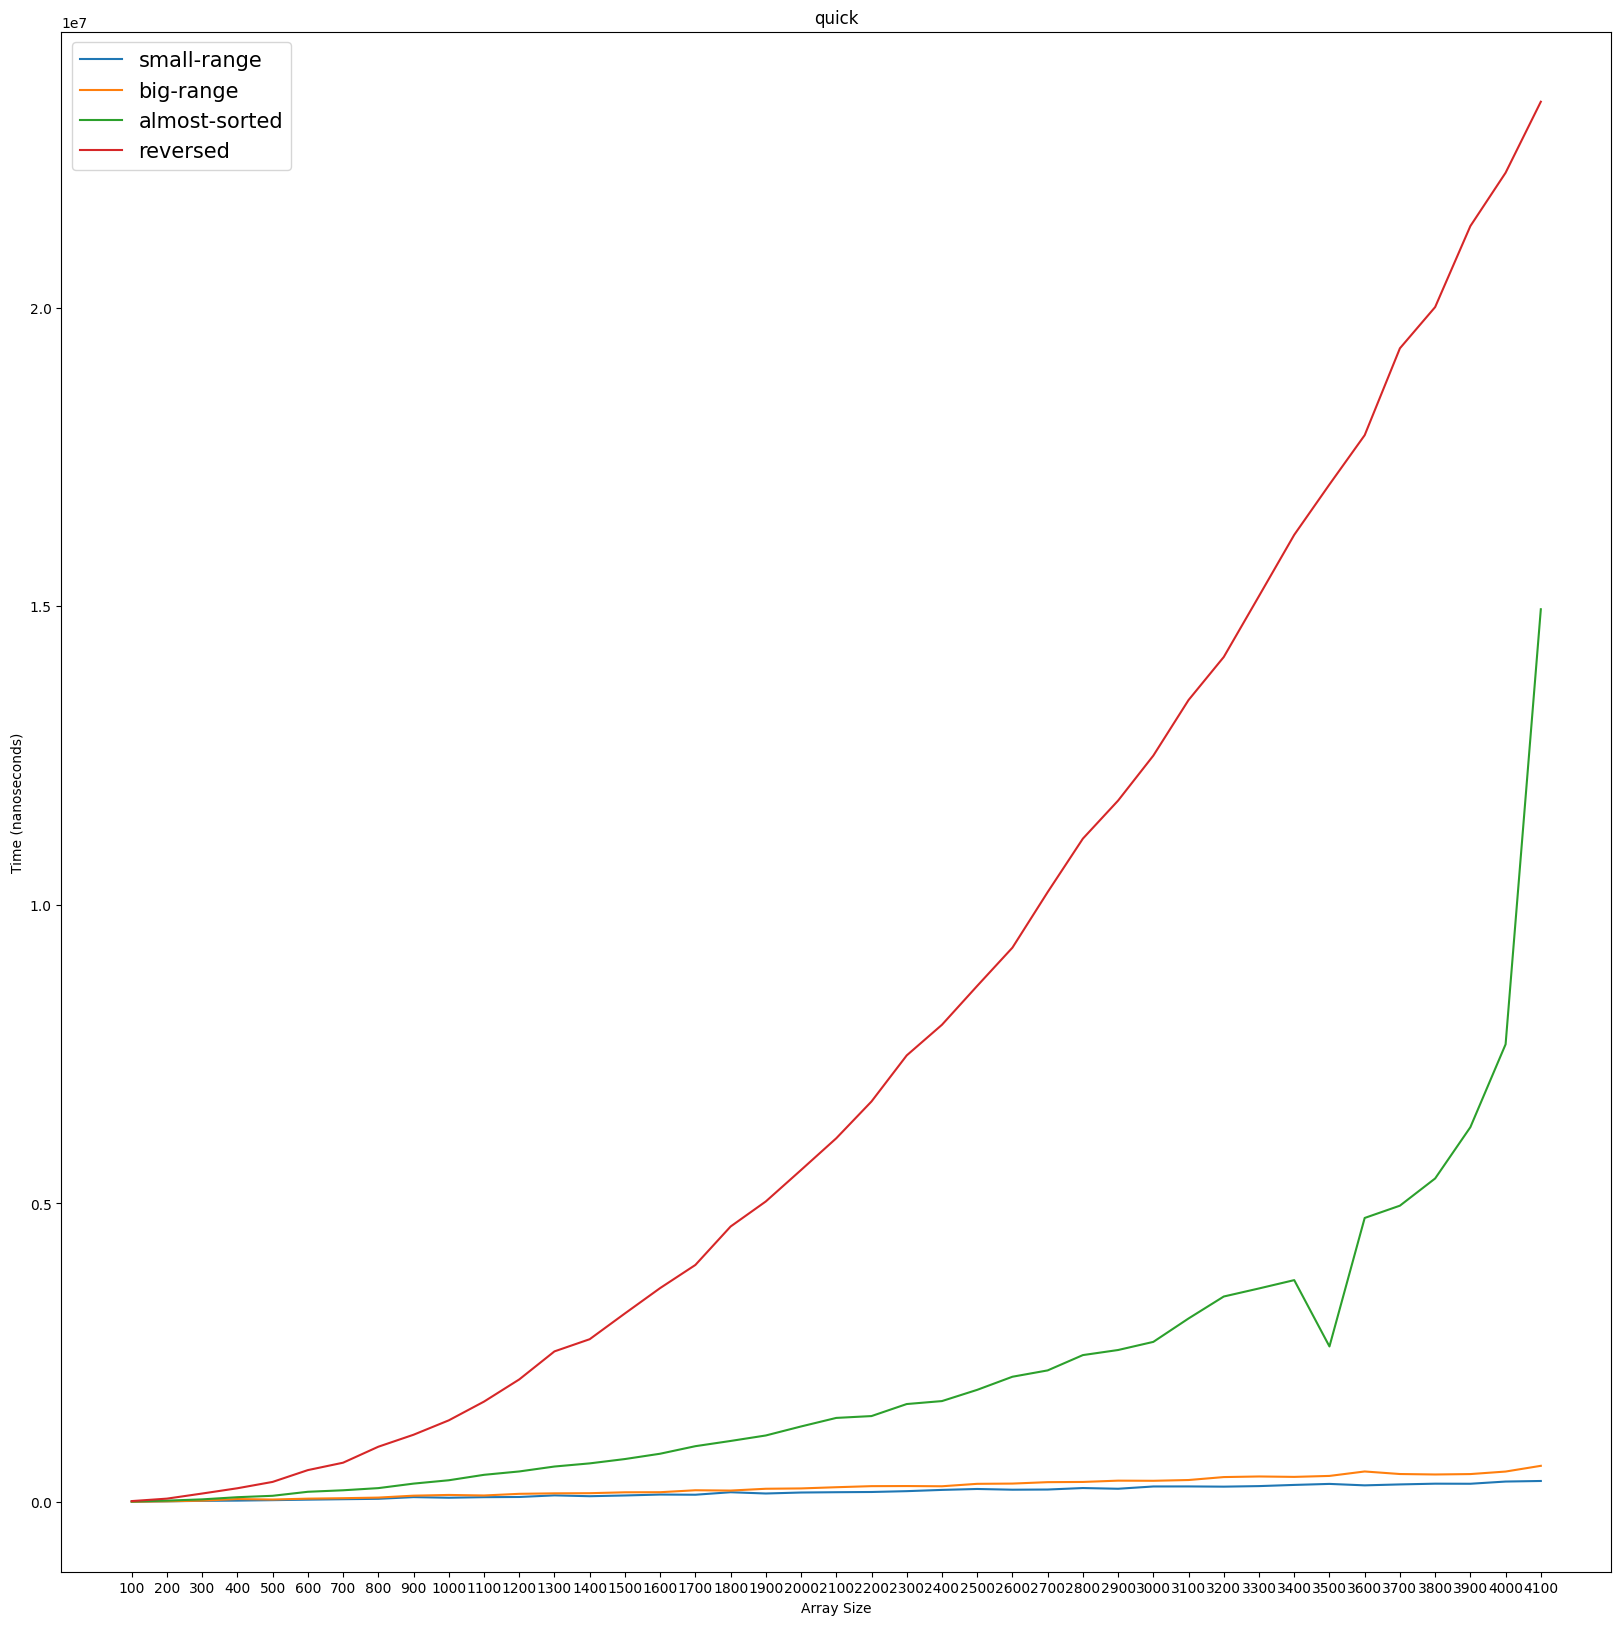

In [49]:
print_sort(data, sorts[9])

**Вывод:** выбор первого элемента в качестве опорного сводит сортировку к квадрату для массивов близких к отсортированному в ту или иную сторону. Для случайных массивов получили вероятностный `nlogn`

### 11. Пирамидальная

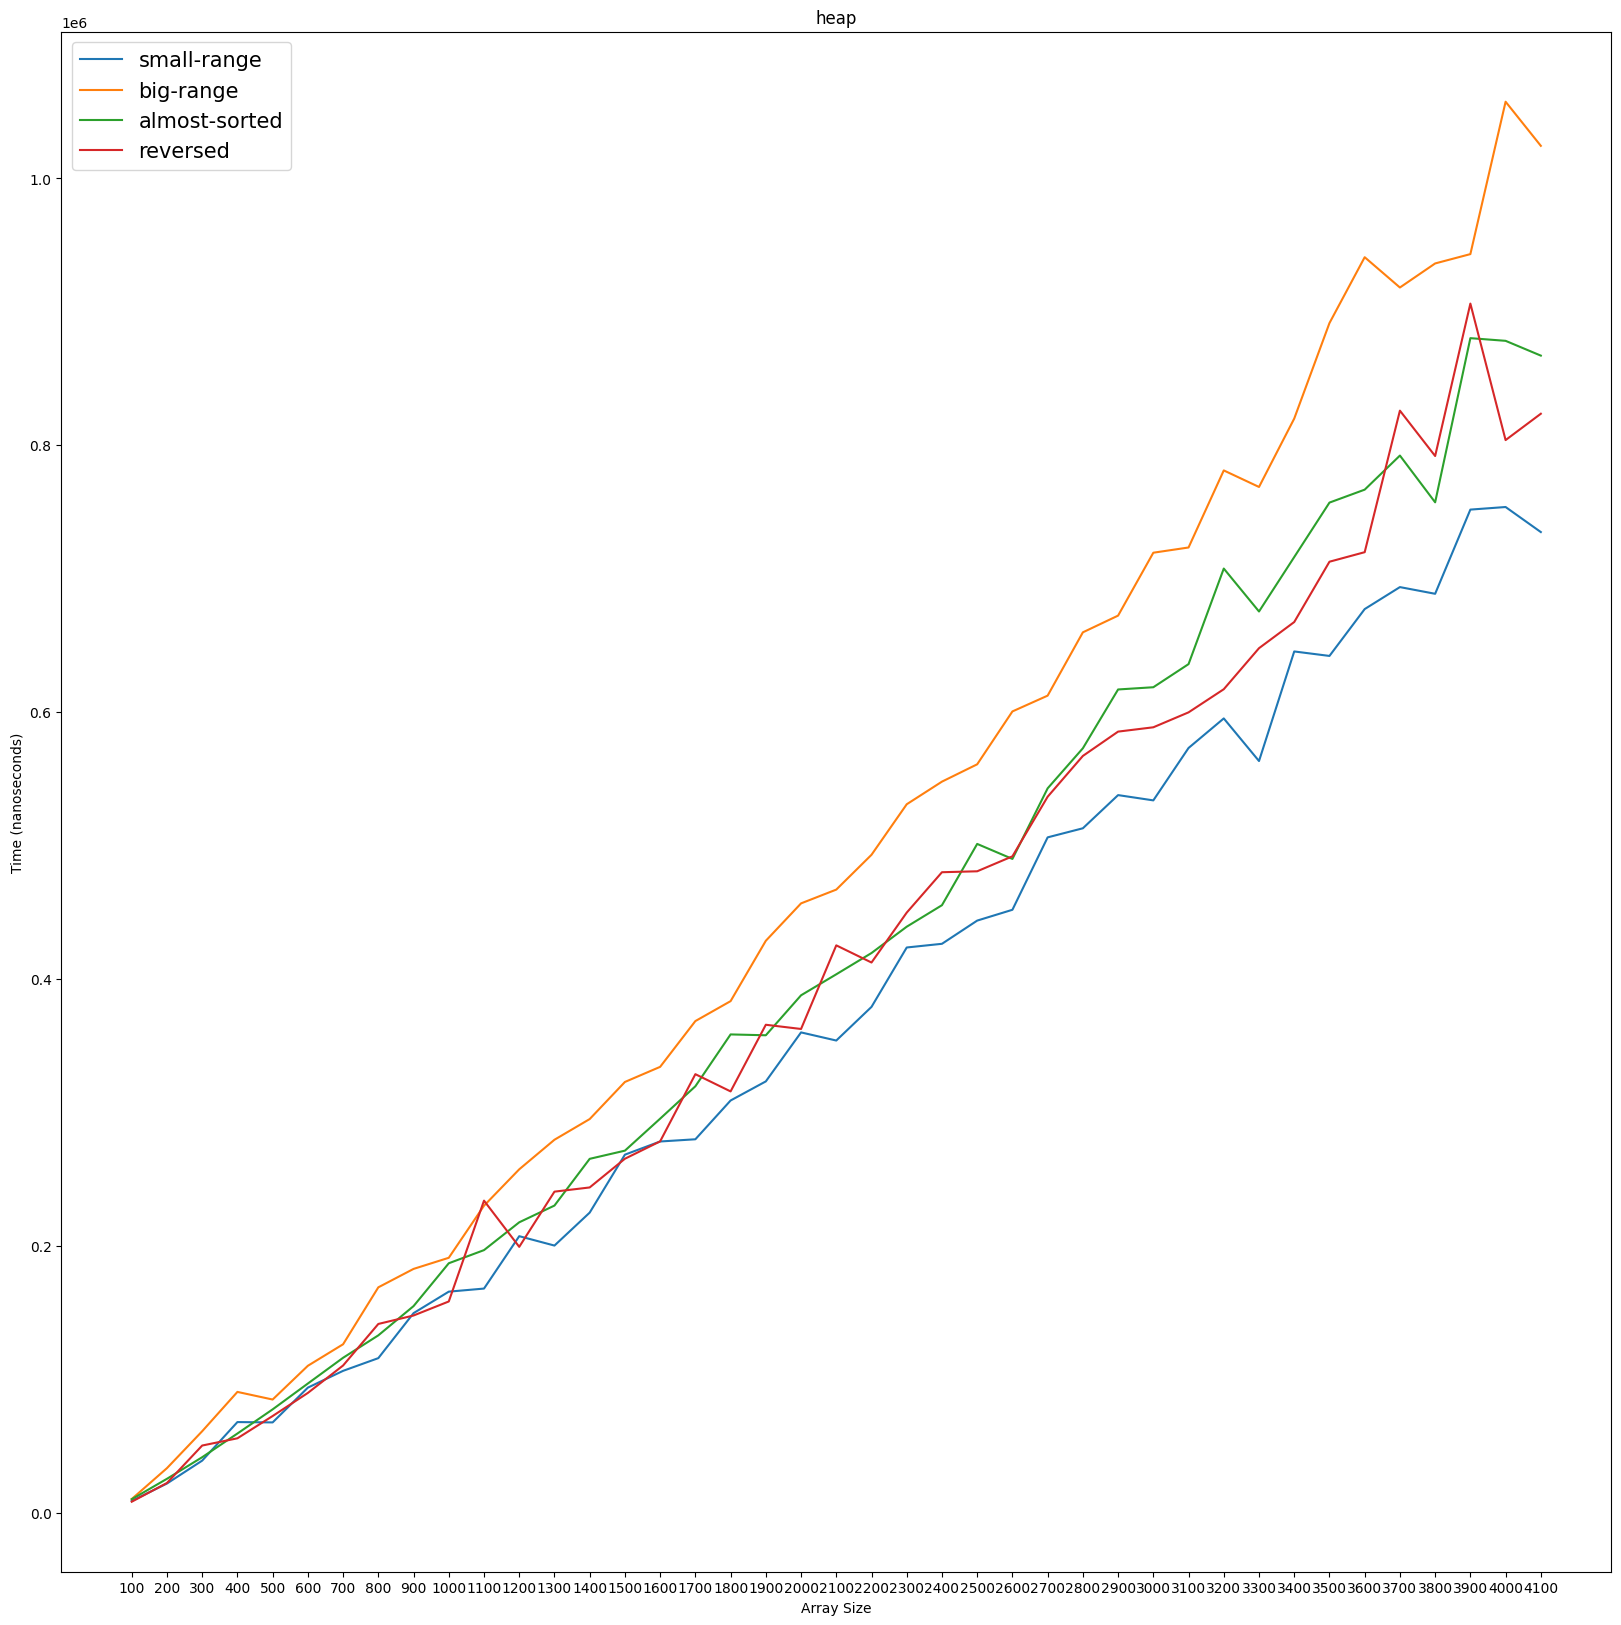

In [50]:
print_sort(data, sorts[10])

**Вывод:** аналогично выводу для небольшого размера массива -- мы не свопаем одинаковые значения в `heapify`, поэтому увеличение диапазона значений замедляет сортировку

### 12. Шелла (последовательность Циура)

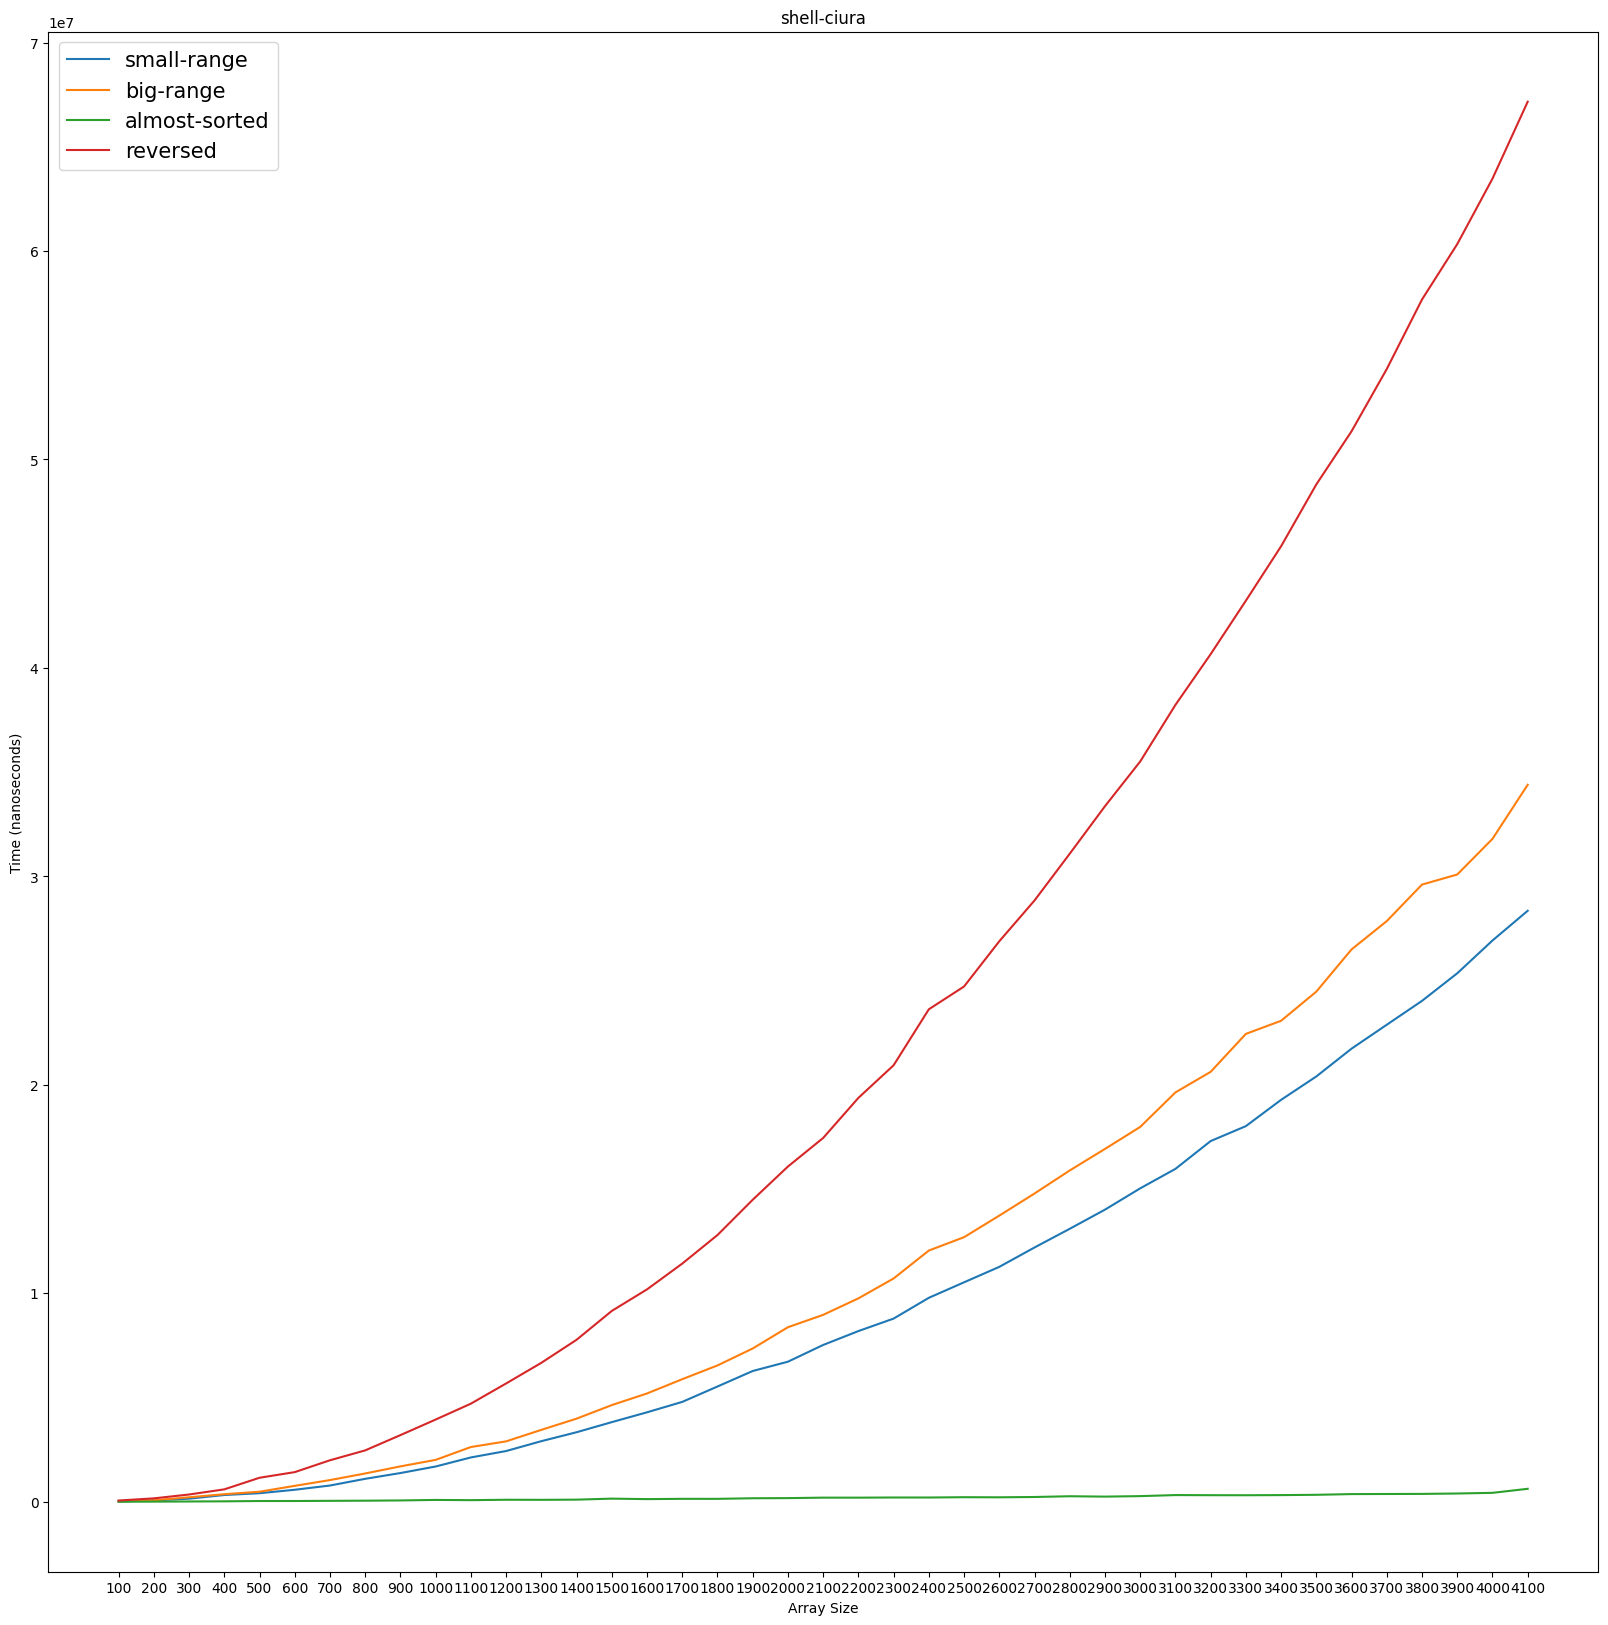

In [51]:
print_sort(data, sorts[11])

**Вывод:** видимо, последовательность подбирали с ориентиром на почти отсортированные и близкие к ним массивы, что видно на графике

### 13. Шелла (последовательность Шелла)

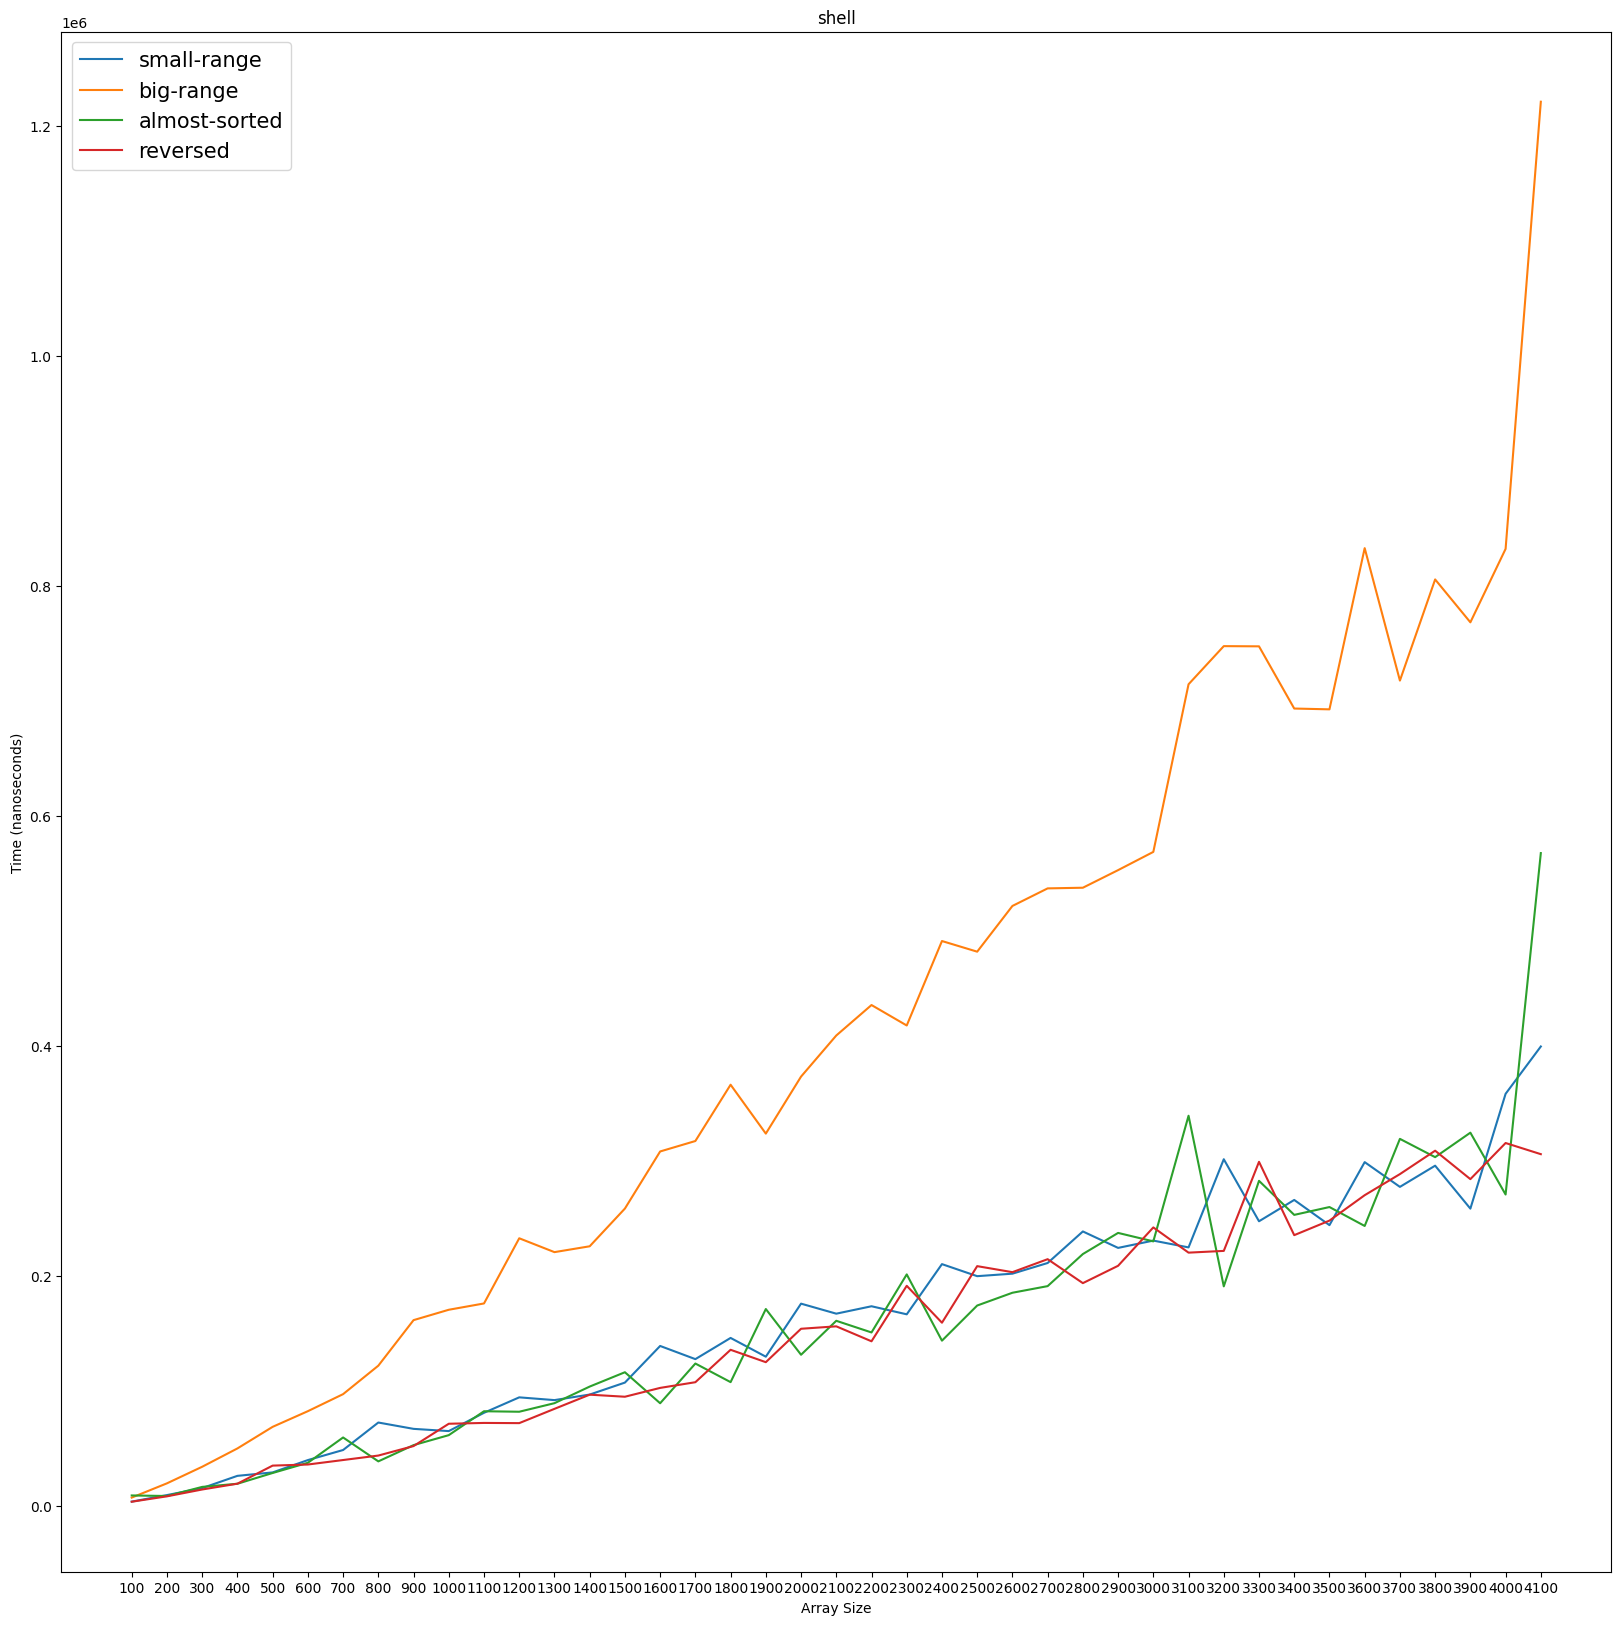

In [52]:
print_sort(data, sorts[12])

**Вывод:** видим значительное замедление сортировки для массива с большим дапазоном значений, предположу, что, во-первых, не самый удачный случайный массив, во-вторых, меньше одинаковых значений => чаще делаем свопы

## По массивам

### 1. Случайные числа от 0 до 5

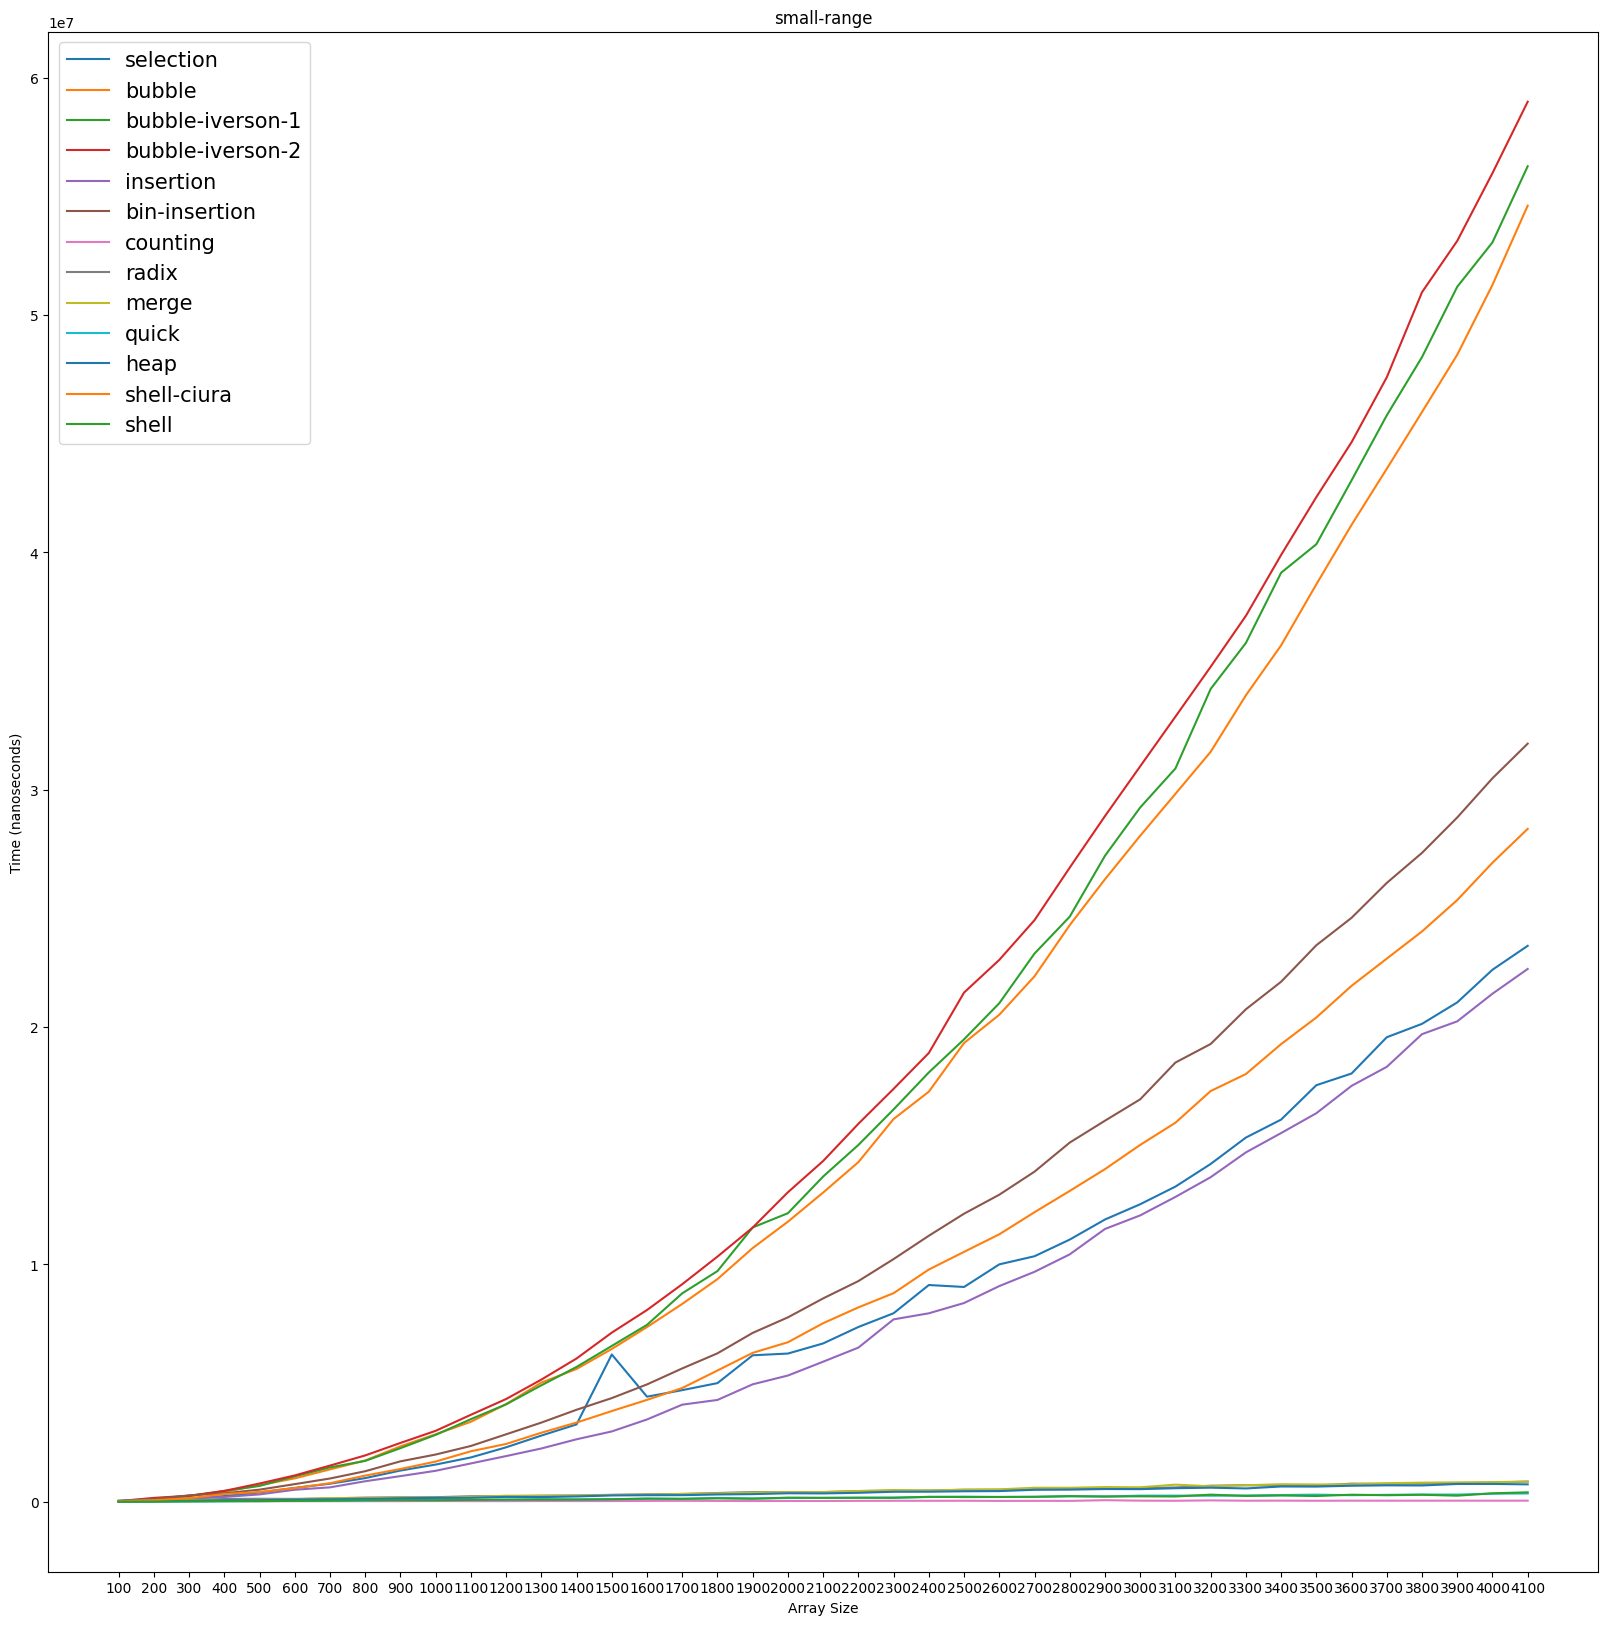

In [53]:
print_array(data, arrays[0])

**Вывод:** пузырьковые сортировки показали худший результат, потому что фактически часто вырождаются в квадрат. Более умные сортировки за асимптотический квадрат (`bin-insertion`, `shell-ciura`, `selection`, `insertion`) в среднем показывают результаты лучше

### 2. Случайные числа от 0 до 4000

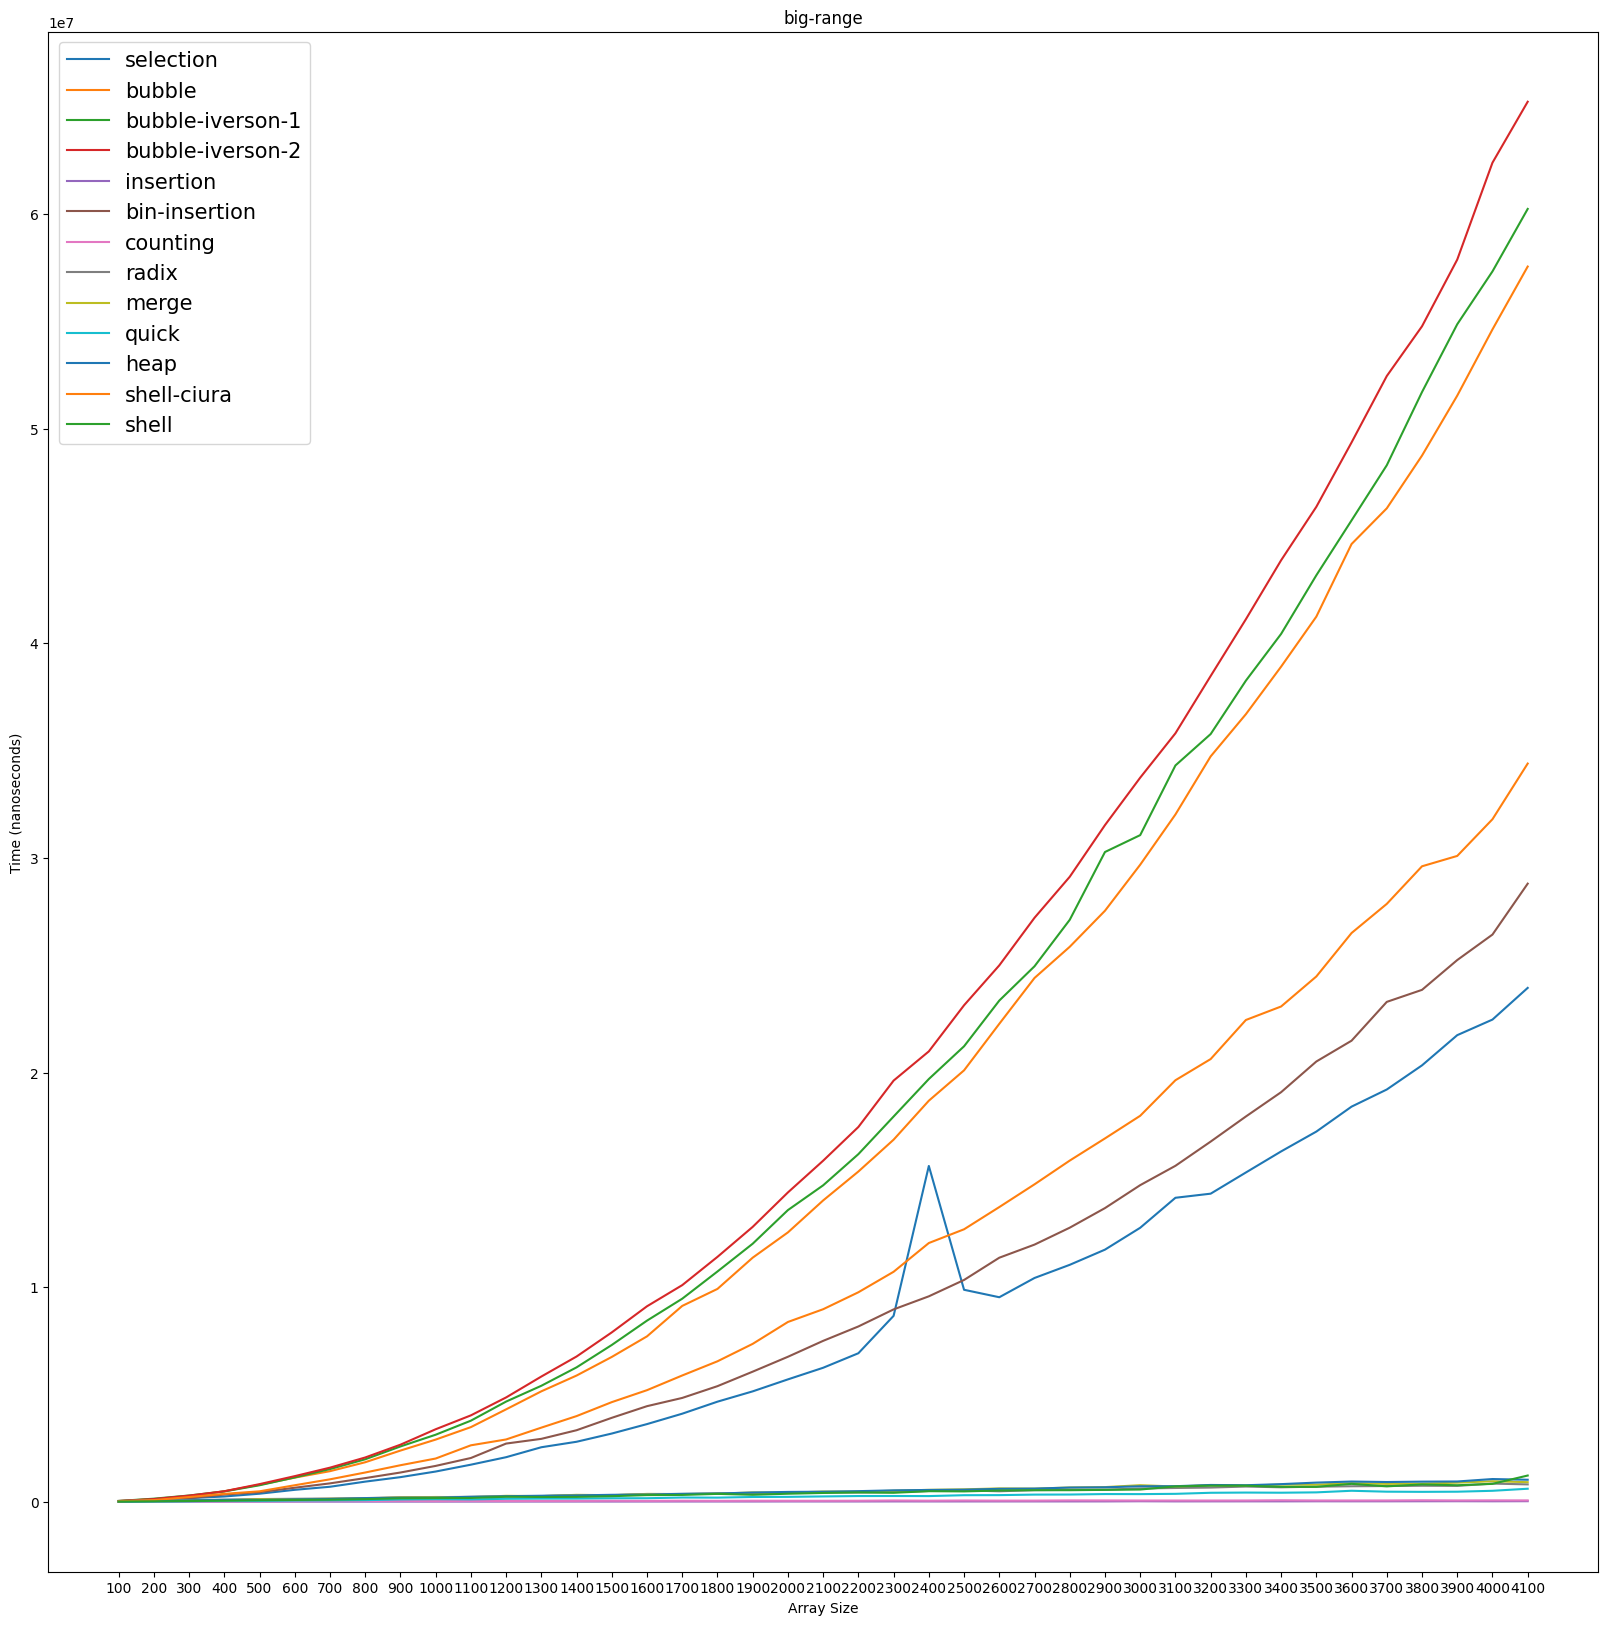

In [54]:
print_array(data, arrays[1])

**Вывод:** аналогично предыдущему случаю, но `insertion` показала себя подобно сортировкам за `nlogn`

### 3. Почти отсортированный массив

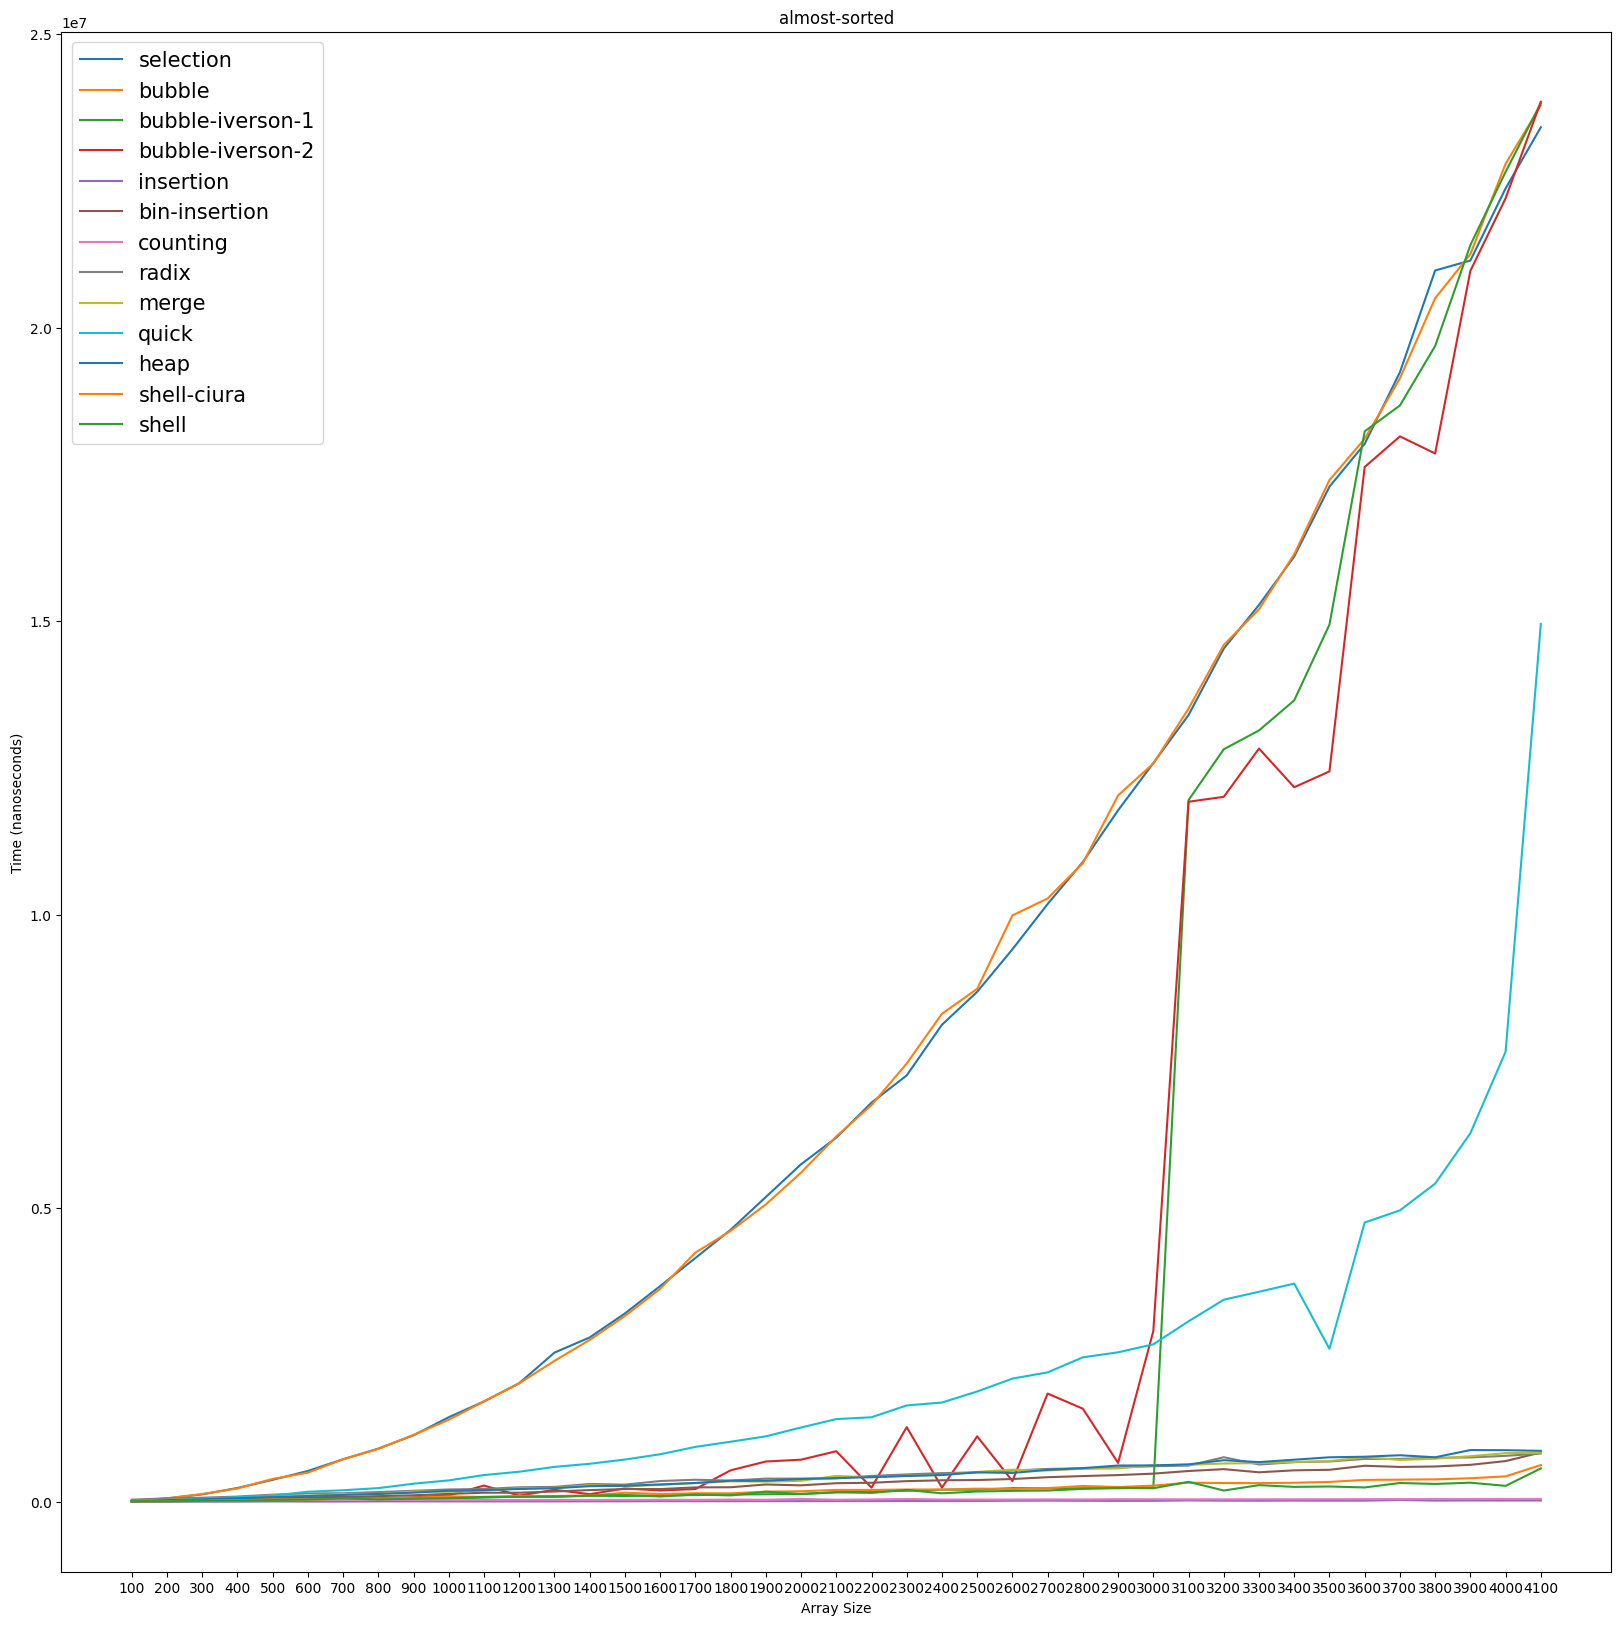

In [55]:
print_array(data, arrays[2])

**Вывод:** Из интересного -- видна деградация `quick` к квадратичным сортировкам. Проблему с пузырьком так и не решила (вероятно, это из-за генерации массива).

### 4. Отсортированный в обратном порядке массив

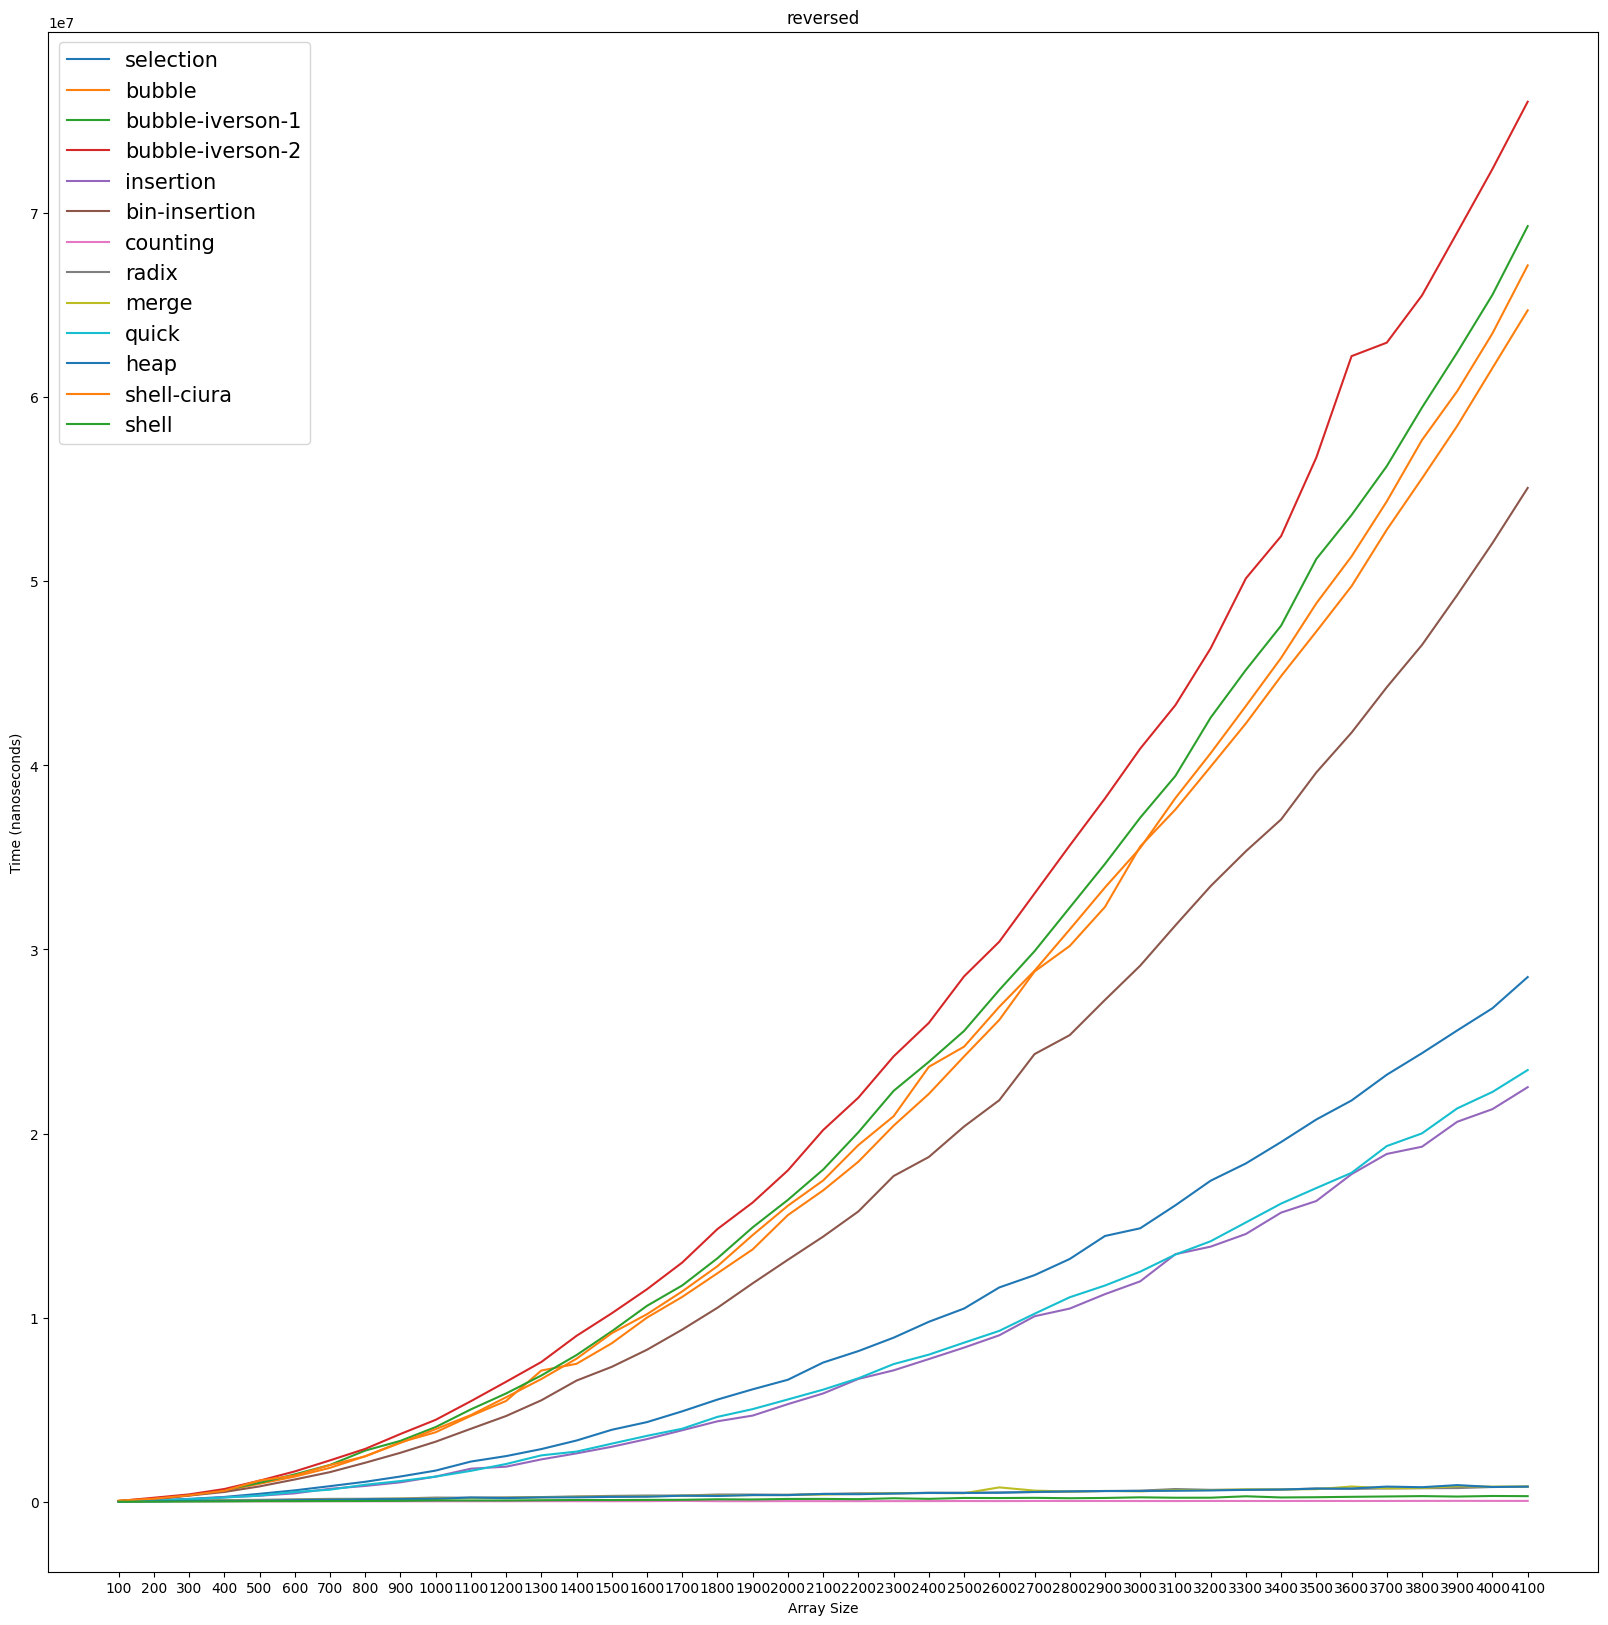

In [56]:
print_array(data, arrays[3])

**Вывод:** ожидаемо плохо себя показали пузырьковые сортировки. Квадратичные отработали ожидаемо. Можно отметить `quick`, который попал в группу квадратичных из-за деградации